## Universidad del Valle de Guatemala

### Integrantes
Juan Manuel Marroquin Alfaro 19845
Carlos Alberto Raxtúm Ramos 19721
Jose Abraham Gutierrez Corado 19111
Walter Danilo Saldaña Salguero 19897
Javier Alejandro Cotto Argueta 19324

### Mineria de Datos
### Sección 20
### 25/02/2022

In [49]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.stats import norm
import seaborn as sns
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
#import pyclustertend 
import random
#from yellowbrick.cluster import SilhouetteVisualizer
#from yellowbrick.datasets import load_nfl
import scipy.stats as stats
%matplotlib inline

In [2]:
pd.set_option("display.max_columns", None)

## Divorcios

### Carga del DataFrame

In [3]:
divorcios = pd.read_csv('./Archivos/divorcios.csv',low_memory=False)
divorcios

,depreg,mupreg,mesreg,anoreg,diaocu,mesocu,anoocu,depocu,mupocu,edadhom,edadmuj,puehom,puemuj,nachom,nacmuj,ciuohom,ciuomuj,mever,anover,eschom,escmuj
0,Guatemala,Guatemala,Mayo,10.0,4.0,Febrero,9.0,Guatemala,Guatemala,Ignorado,Ignorado,ignorado,ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Enero,2000.0,NaN,NaN
1,Guatemala,Santa Catarina Pinula,Marzo,9.0,4.0,Marzo,9.0,Guatemala,Guatemala,36.0,26.0,ignorado,ignorado,Guatemala,Guatemala,Ignorado,Ignorado,Marzo,2000.0,NaN,NaN
2,Guatemala,Santa Catarina Pinula,Abril,9.0,4.0,Marzo,9.0,Guatemala,Guatemala,36.0,26.0,ignorado,ignorado,Guatemala,Guatemala,Ignorado,Ignorado,Marzo,2000.0,NaN,NaN
3,Chimaltenango,Chimaltenango,Julio,9.0,4.0,Mayo,9.0,Guatemala,Guatemala,Ignorado,29.0,ignorado,ignorado,Guatemala,Guatemala,Ignorado,Ignorado,Marzo,2000.0,NaN,NaN
4,Guatemala,Petapa,Junio,9.0,5.0,Mayo,9.0,Guatemala,Guatemala,33.0,34.0,no indigena,no indigena,Guatemala,Guatemala,Estudiante,Secretarios administrativos y ejecutivos,Abril,2000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60621,Sacatepequez,Antigua Guatemala,Diciembre,2011.0,12.0,Septiembre,2011.0,Sacatepequez,Antigua Guatemala,Ignorado,Ignorado,No indigena,No indigena,Guatemala,Estados Unidos de América,Ignorado,Ignorado,NaN,NaN,Ignorado,Ignorado
60622,Suchitepequez,Mazatenango,Julio,2011.0,27.0,Mayo,2011.0,Suchitepequez,Mazatenango,49.0,Ignorado,No indigena,Ignorado,Guatemala,Estados Unidos de América,Agricultores y trabajadores calificados de cul...,Secretarios (general),NaN,NaN,Universitario,Ignorado
60623,Solola,Panajachel,Diciembre,2011.0,1.0,Diciembre,2011.0,Solola,Sololá,Ignorado,Ignorado,Ignorado,Ignorado,Estados Unidos de América,Estados Unidos de América,Ignorado,Ignorado,NaN,NaN,Ignorado,Ninguna
60624,Solola,Santa Cruz la Laguna,Enero,2012.0,5.0,Diciembre,2011.0,Solola,Santa Cruz la Laguna,47.0,49.0,No indigena,No indigena,Francia,Estados Unidos de América,"Filósofos, historiadores y especialistas en ci...",Especialistas en tratamientos de belleza y afines,NaN,NaN,Universitario,Universitario


### Eliminacion de datos que no contienen los valores de eschom y escmuj, eliminacion de las columnas mever y anover y eliminacion de filas que contienen mas de algun valor NaN

In [4]:
drop_rows = []
for i in range(0, 3006):
    drop_rows.append(i)
    
divorcios = divorcios.drop(drop_rows)

In [5]:
divorcios = divorcios.drop(['mever', 'anover'], axis=1)

In [6]:
divorcios = divorcios.dropna()

#### Convertir datos str a int

In [20]:
divorcios = divorcios.astype({"anoreg": int})
divorcios = divorcios.astype({"diaocu": int})
divorcios = divorcios.astype({"anoocu": int})
divorcios['edadhom'] = pd.to_numeric(divorcios['edadhom'],errors='coerce', downcast="integer")
divorcios['edadmuj'] = pd.to_numeric(divorcios['edadmuj'],errors='coerce', downcast="integer")

<ul>
  <li>Numero de datos: 40959</li>
  <li>Numero de variables: 19</li>
</ul>

<b>Descripcion de las variables:</b>
<ol>
    <li><p style="color:blue">depreg:</p>Cualitativa Nominal</li>
    <li><p style="color:blue">mupreg:</p>Cualitativa Nominal</li>
    <li><p style="color:blue">mesreg:</p>Cualitativa Nominal</li>
    <li><p style="color:red">anoreg:</p>Cuantitativa Discreta</li>
    <li><p style="color:red">diaocu:</p>Cuantitativa Discreta</li>
    <li><p style="color:blue">mesocu:</p>Cualitativa Nominal</li>
    <li><p style="color:red">anoocu:</p>Cuantitativa Discreta</li>
    <li><p style="color:blue">depocu:</p>Cualitativa Nominal</li>
    <li><p style="color:blue">mupocu:</p>Cualitativa Nominal</li>
    <li><p style="color:red">edadhom:</p>Cuantitativa Discreta</li>
    <li><p style="color:red">edadmuj:</p>Cuantitativa Discreta</li>
    <li><p style="color:blue">puehom:</p>Cualitativa Nominal</li>
    <li><p style="color:blue">puemuj:</p>Cualitativa Nominal</li>
    <li><p style="color:blue">nachom:</p>Cualitativa Nominal</li>
    <li><p style="color:blue">nacmuj:</p>Cualitativa Nominal</li>
    <li><p style="color:blue">ciuohom:</p>Cualitativa Nominal</li>
    <li><p style="color:blue">ciuomuj:</p>Cualitativa Nominal</li>
    <li><p style="color:blue">eschom:</p>Cualitativa Nominal</li>
    <li><p style="color:blue">escmuj:</p>Cualitativa Nominal</li>
</ol>

### Grafica de barras para el conteo de las clasificaciones de las variables cualitativas, en orden descendente

In [22]:
divorcios_cualitativos = divorcios.drop(['anoreg', 'diaocu', 'anoocu', 'edadhom', 'edadmuj'], axis=1)
columnas = []

for col in divorcios_cualitativos.columns:
    columnas.append(col)

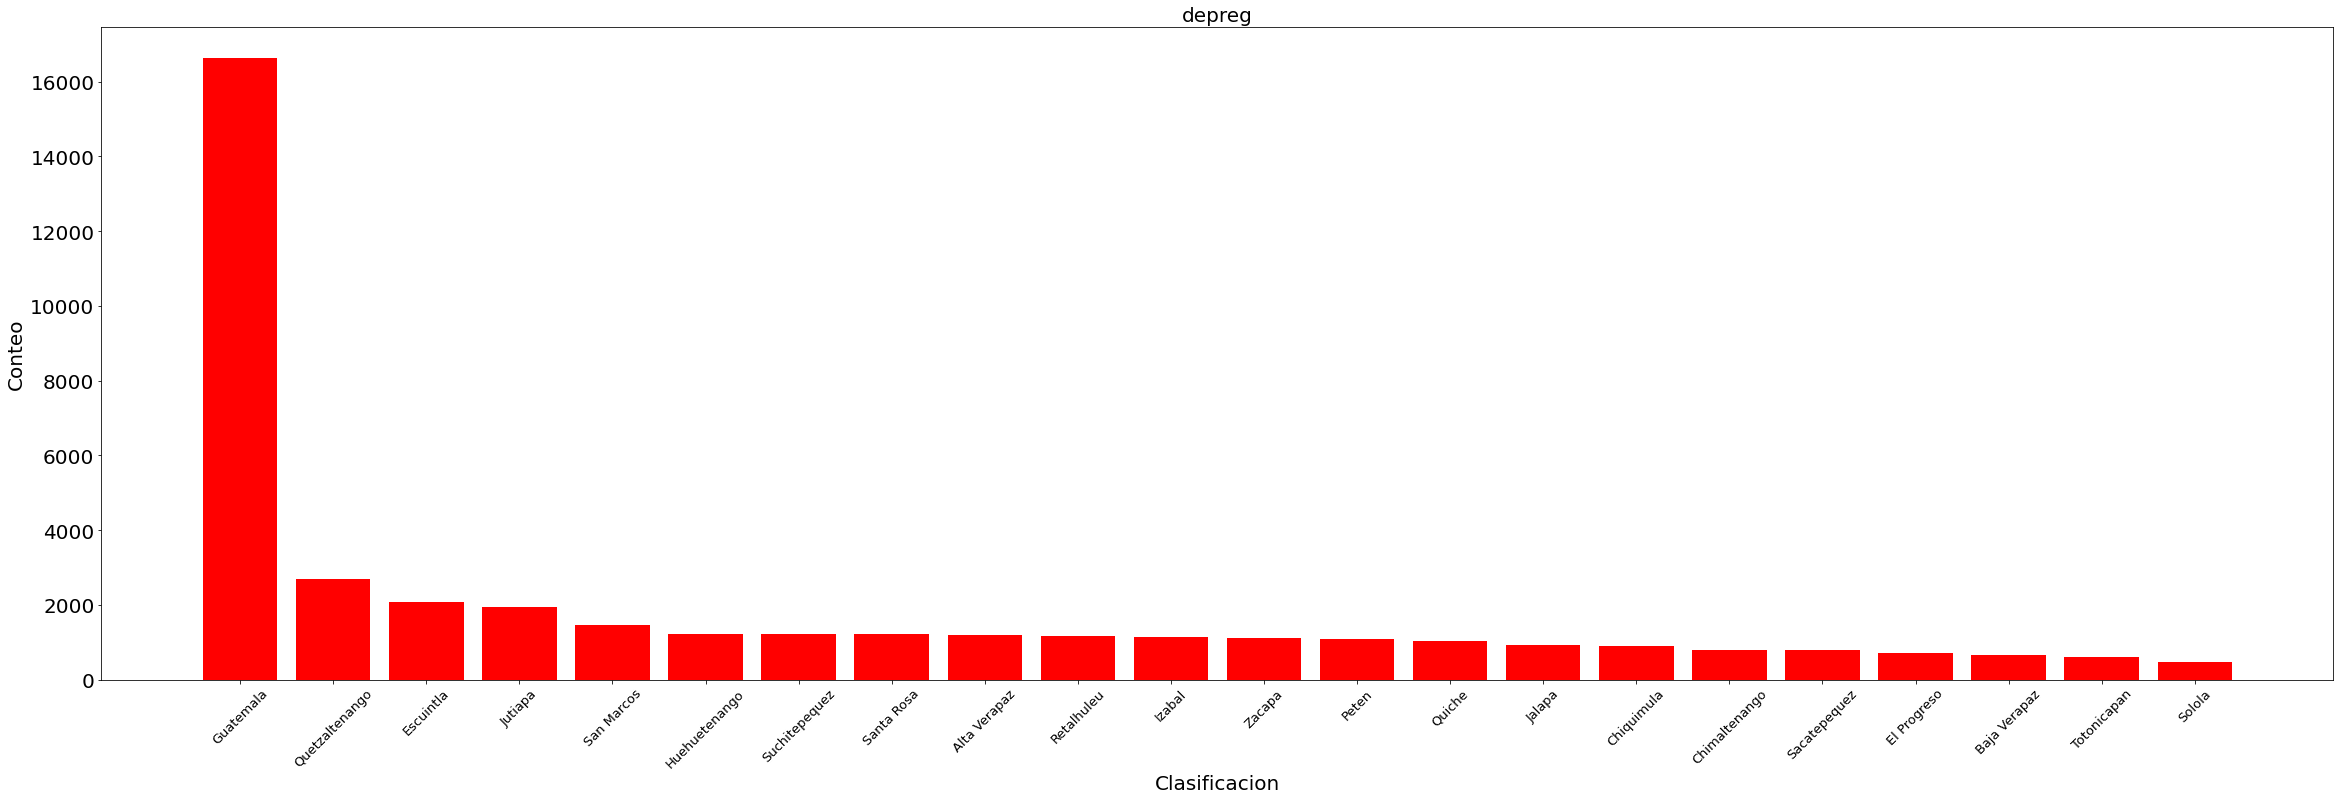

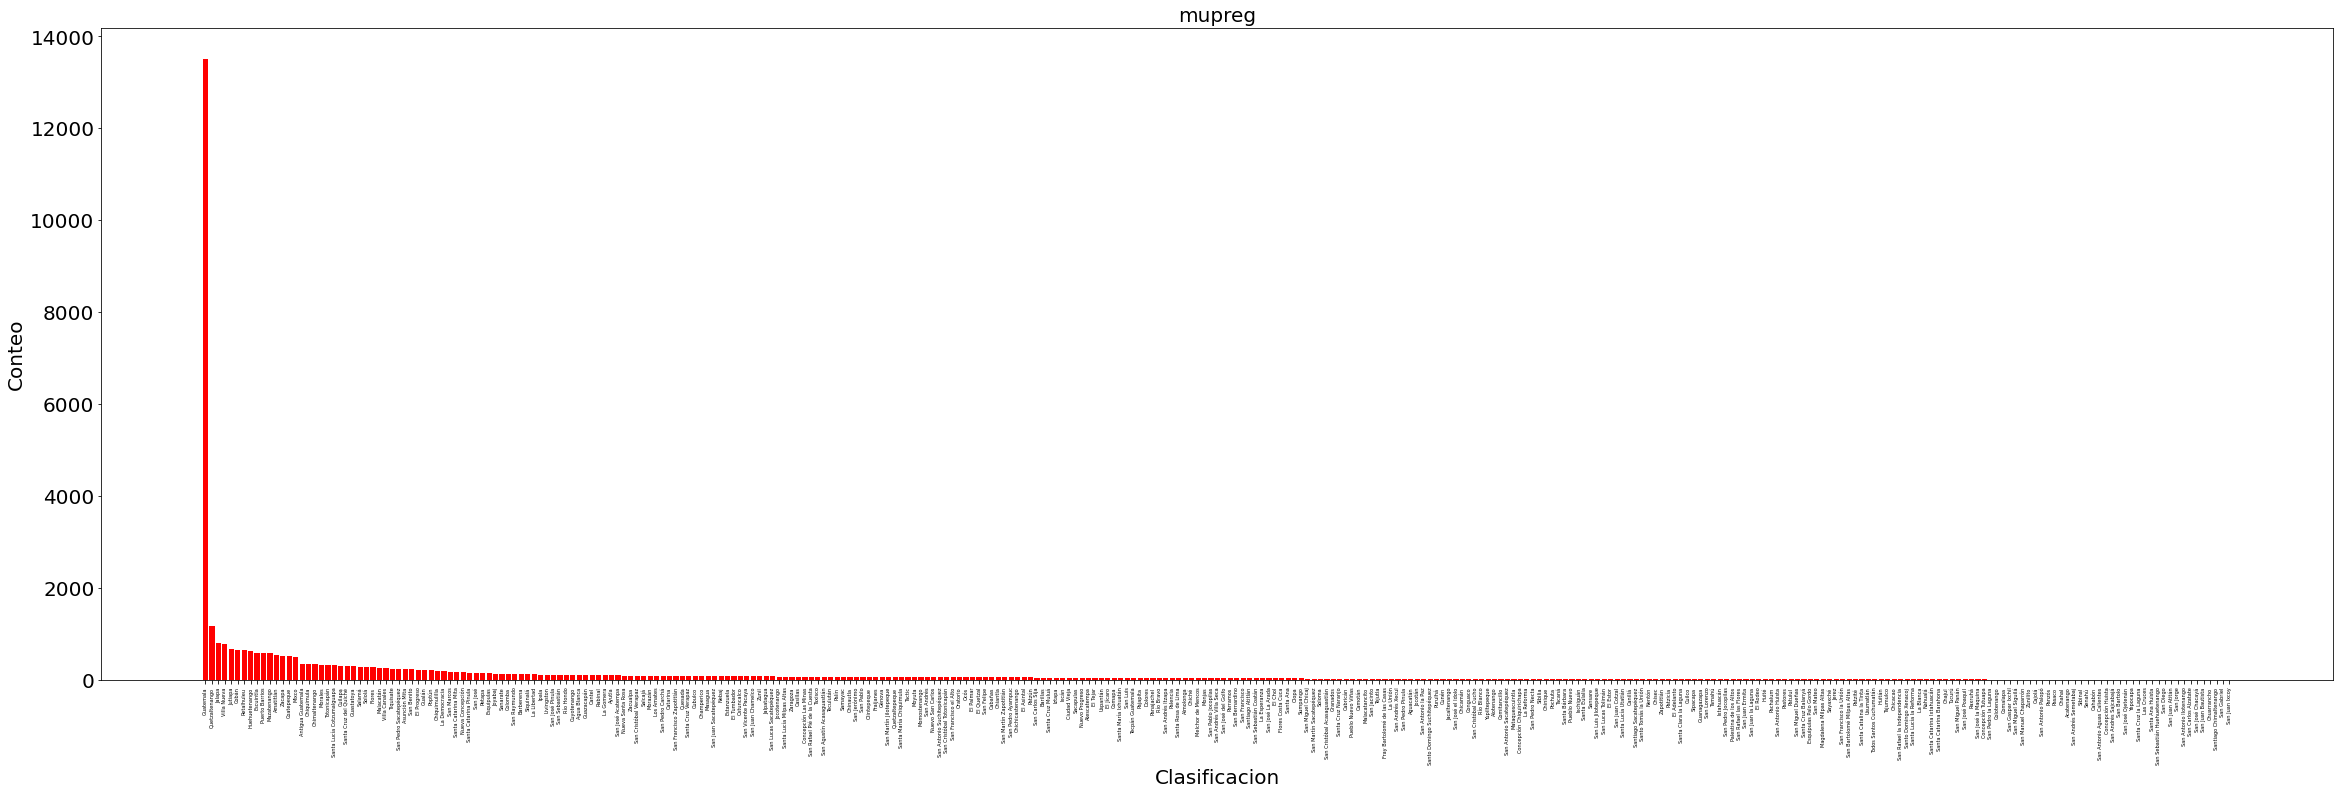

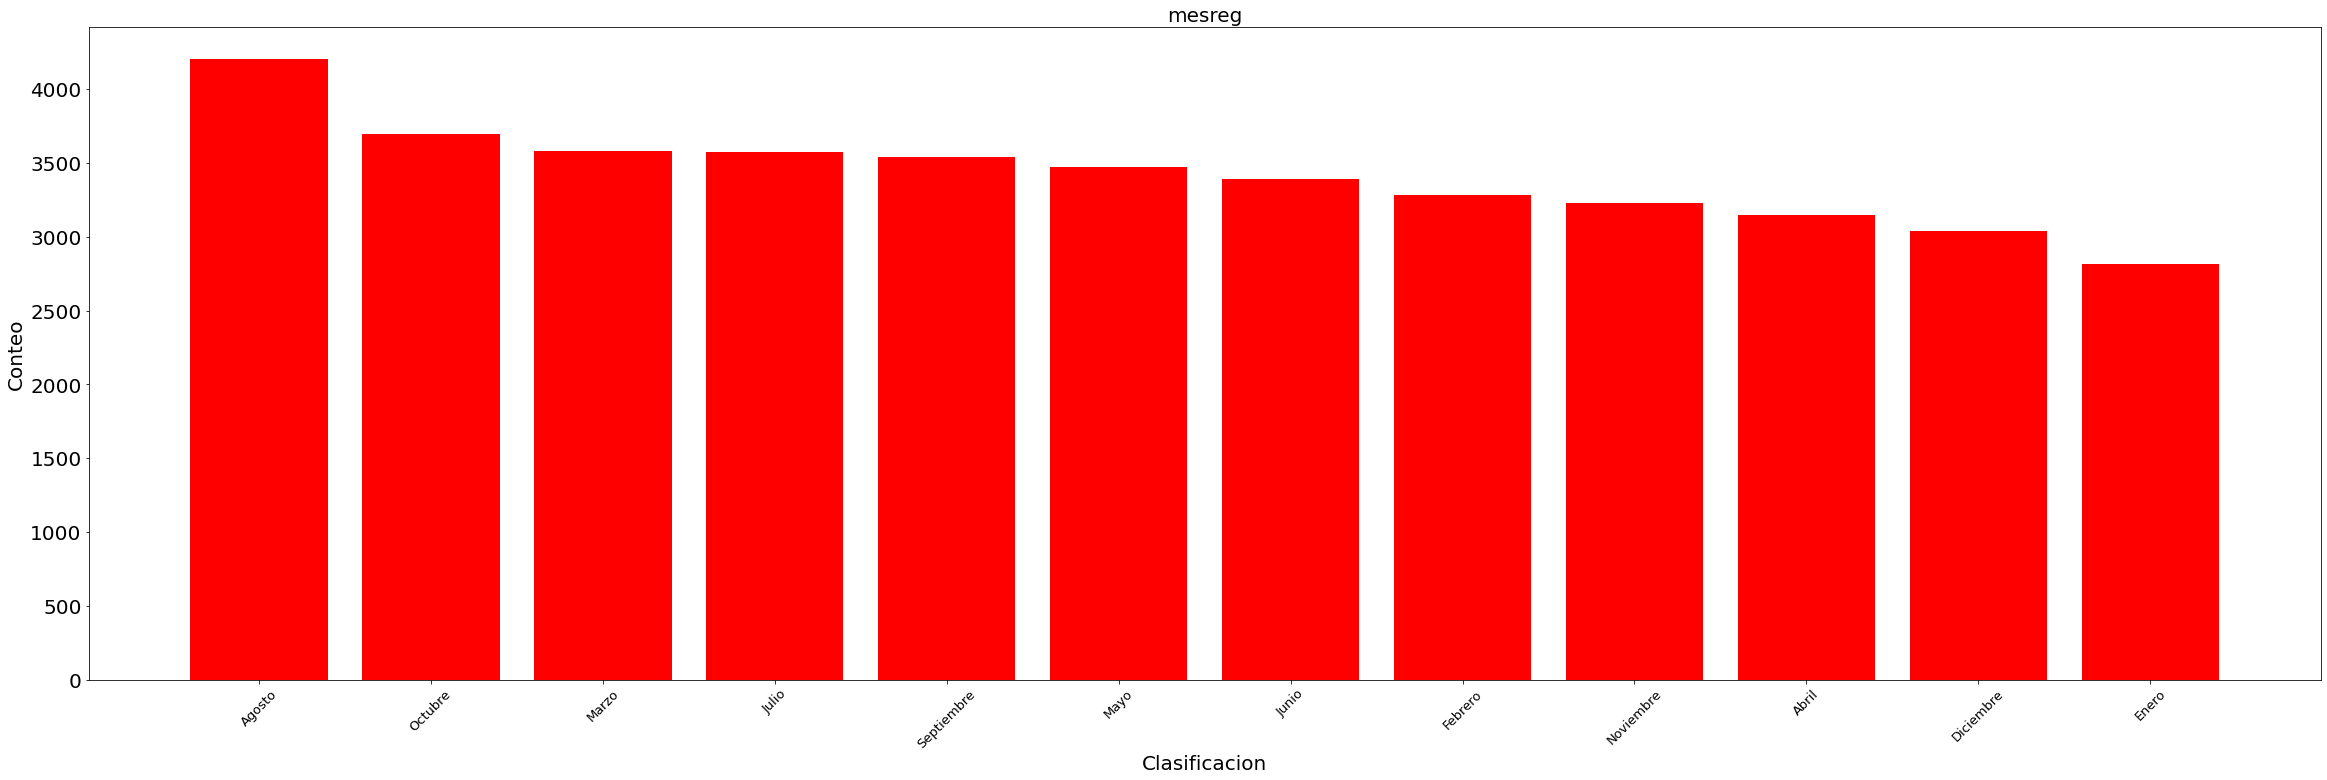

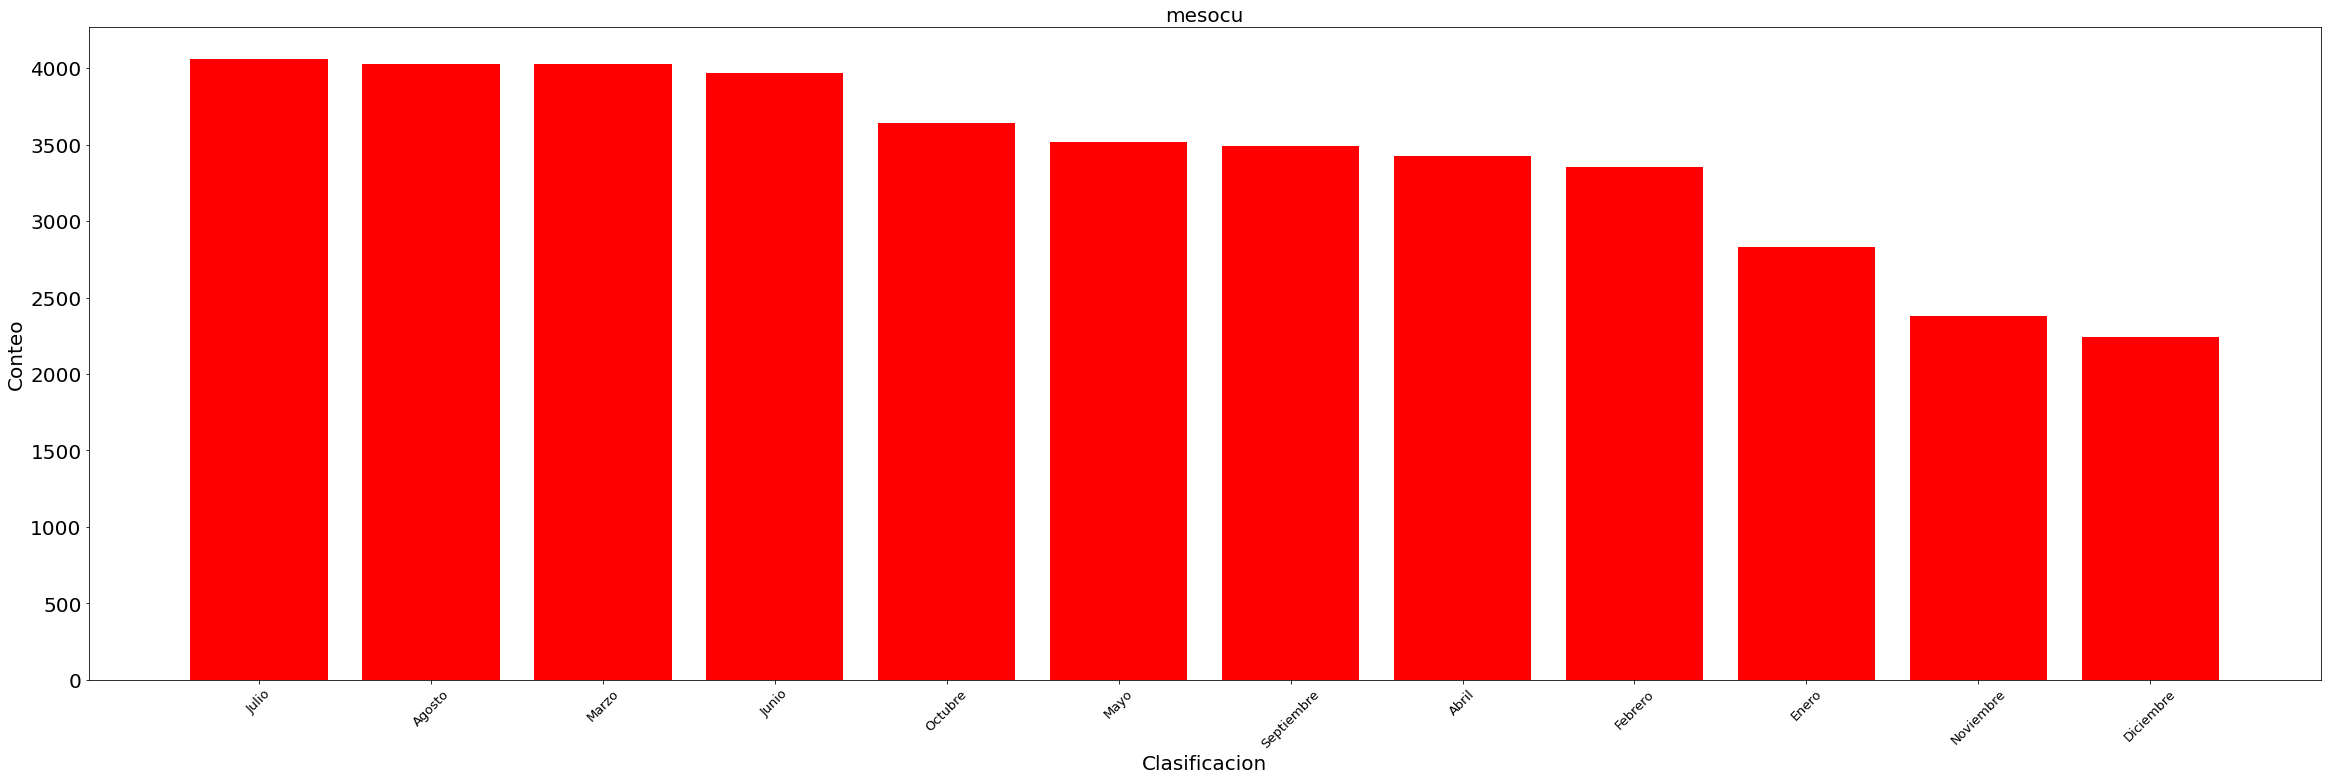

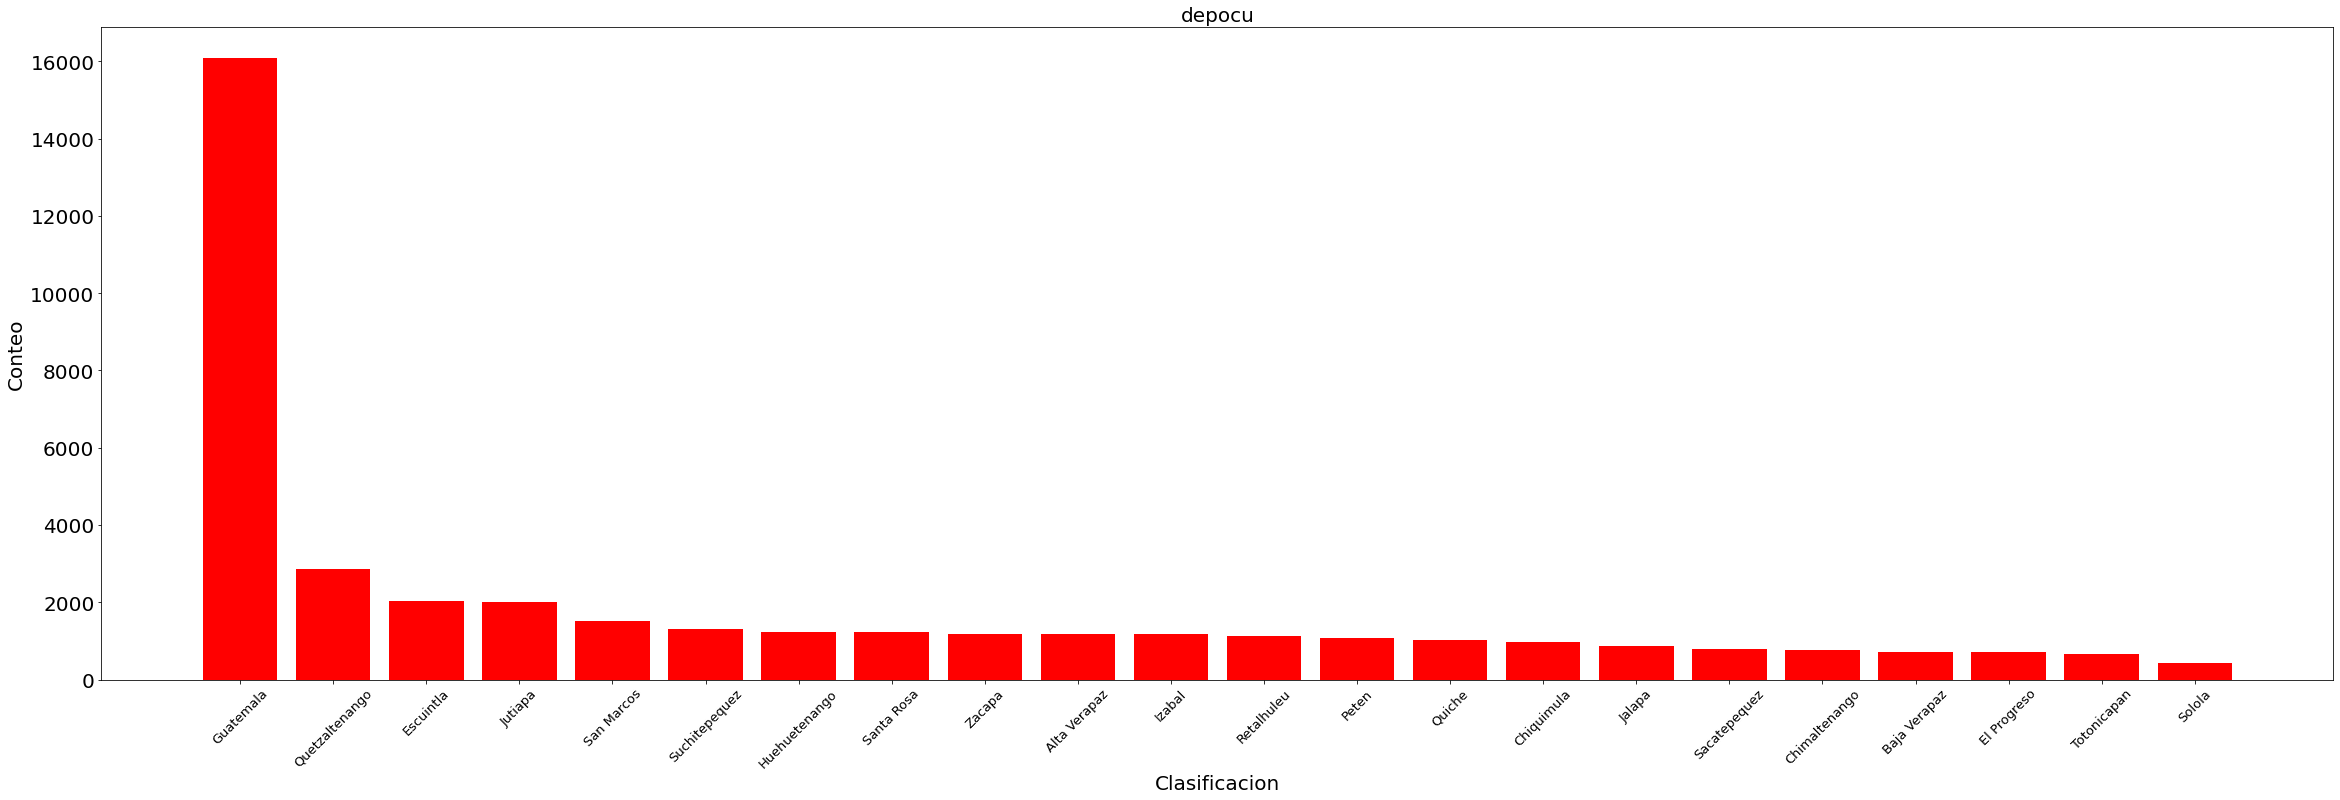

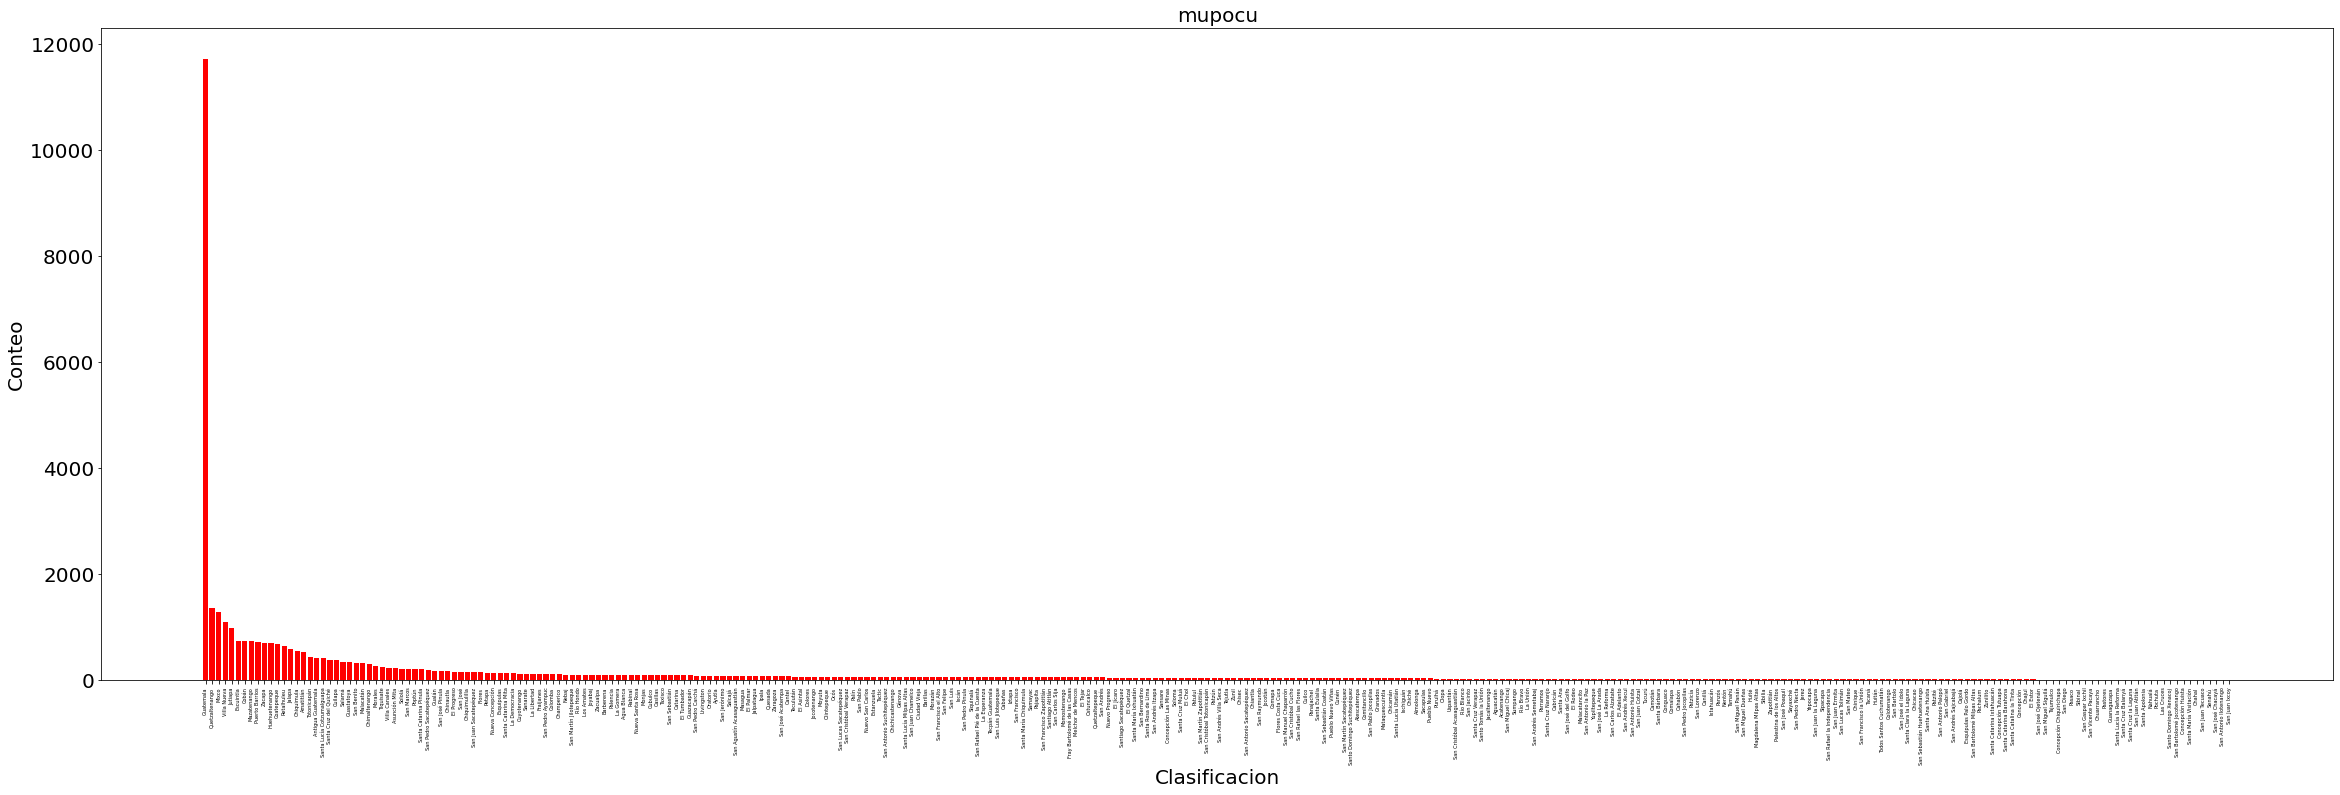

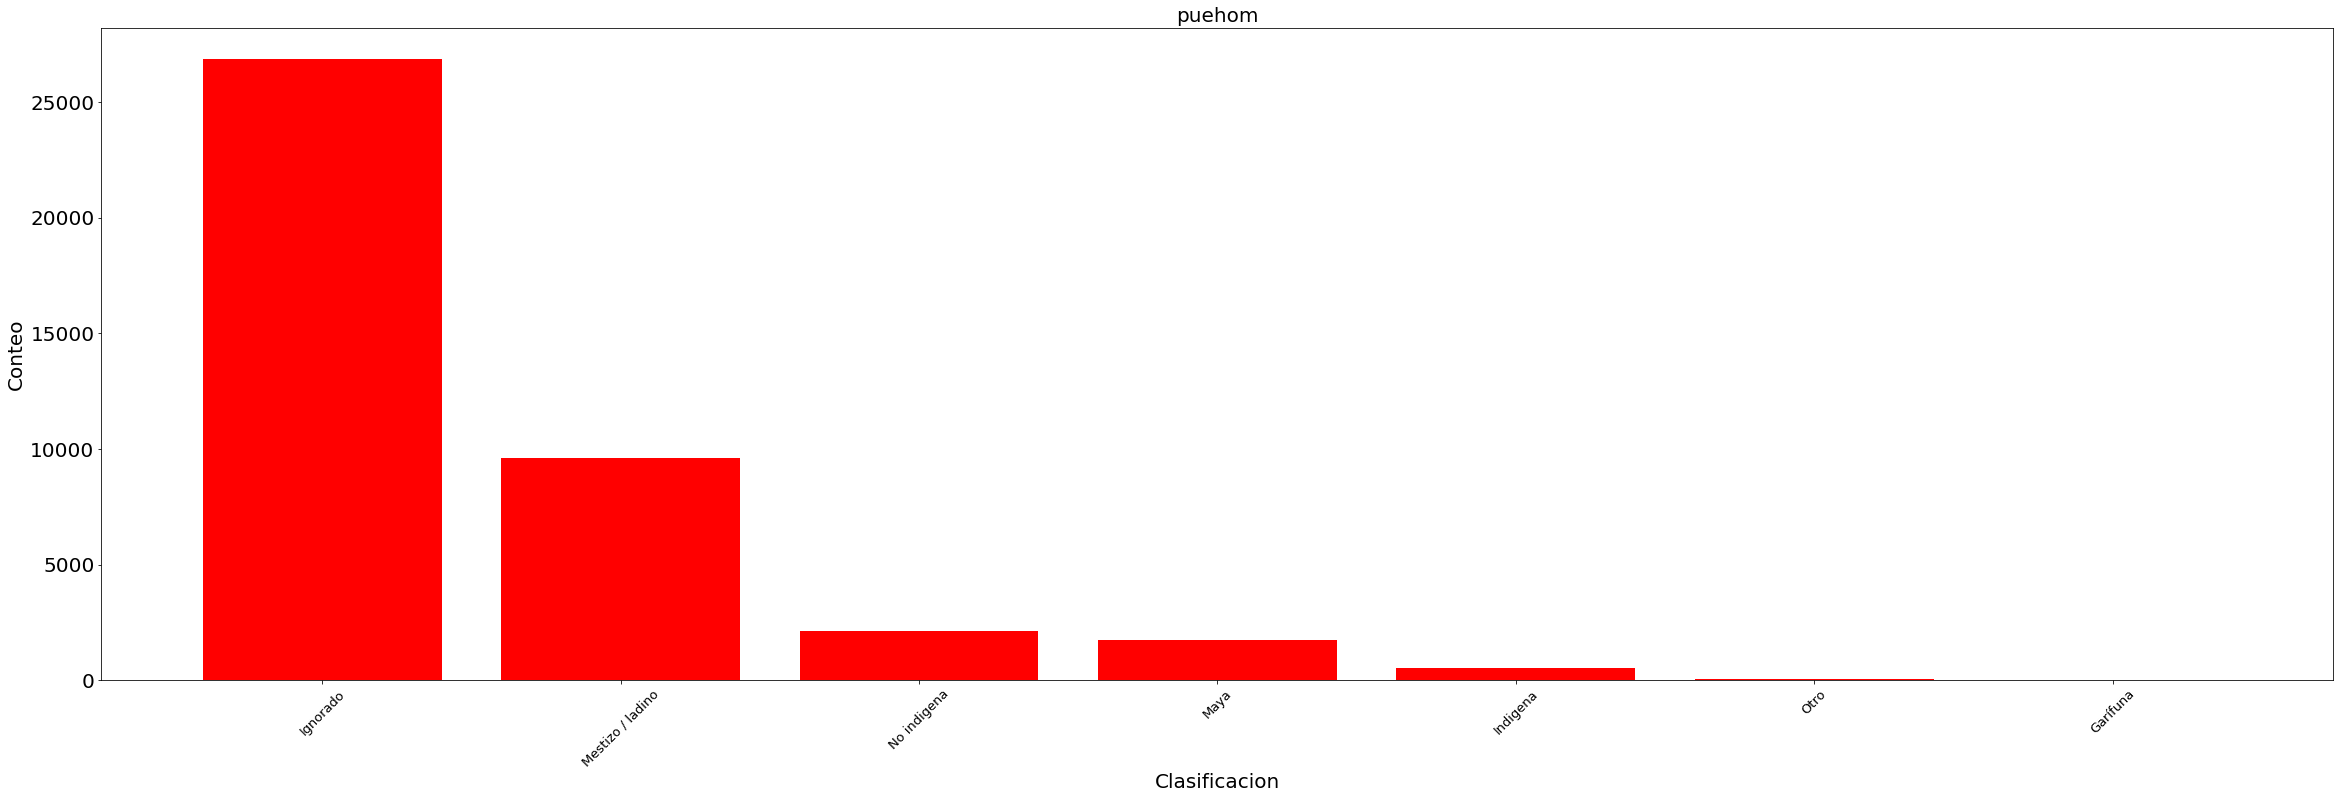

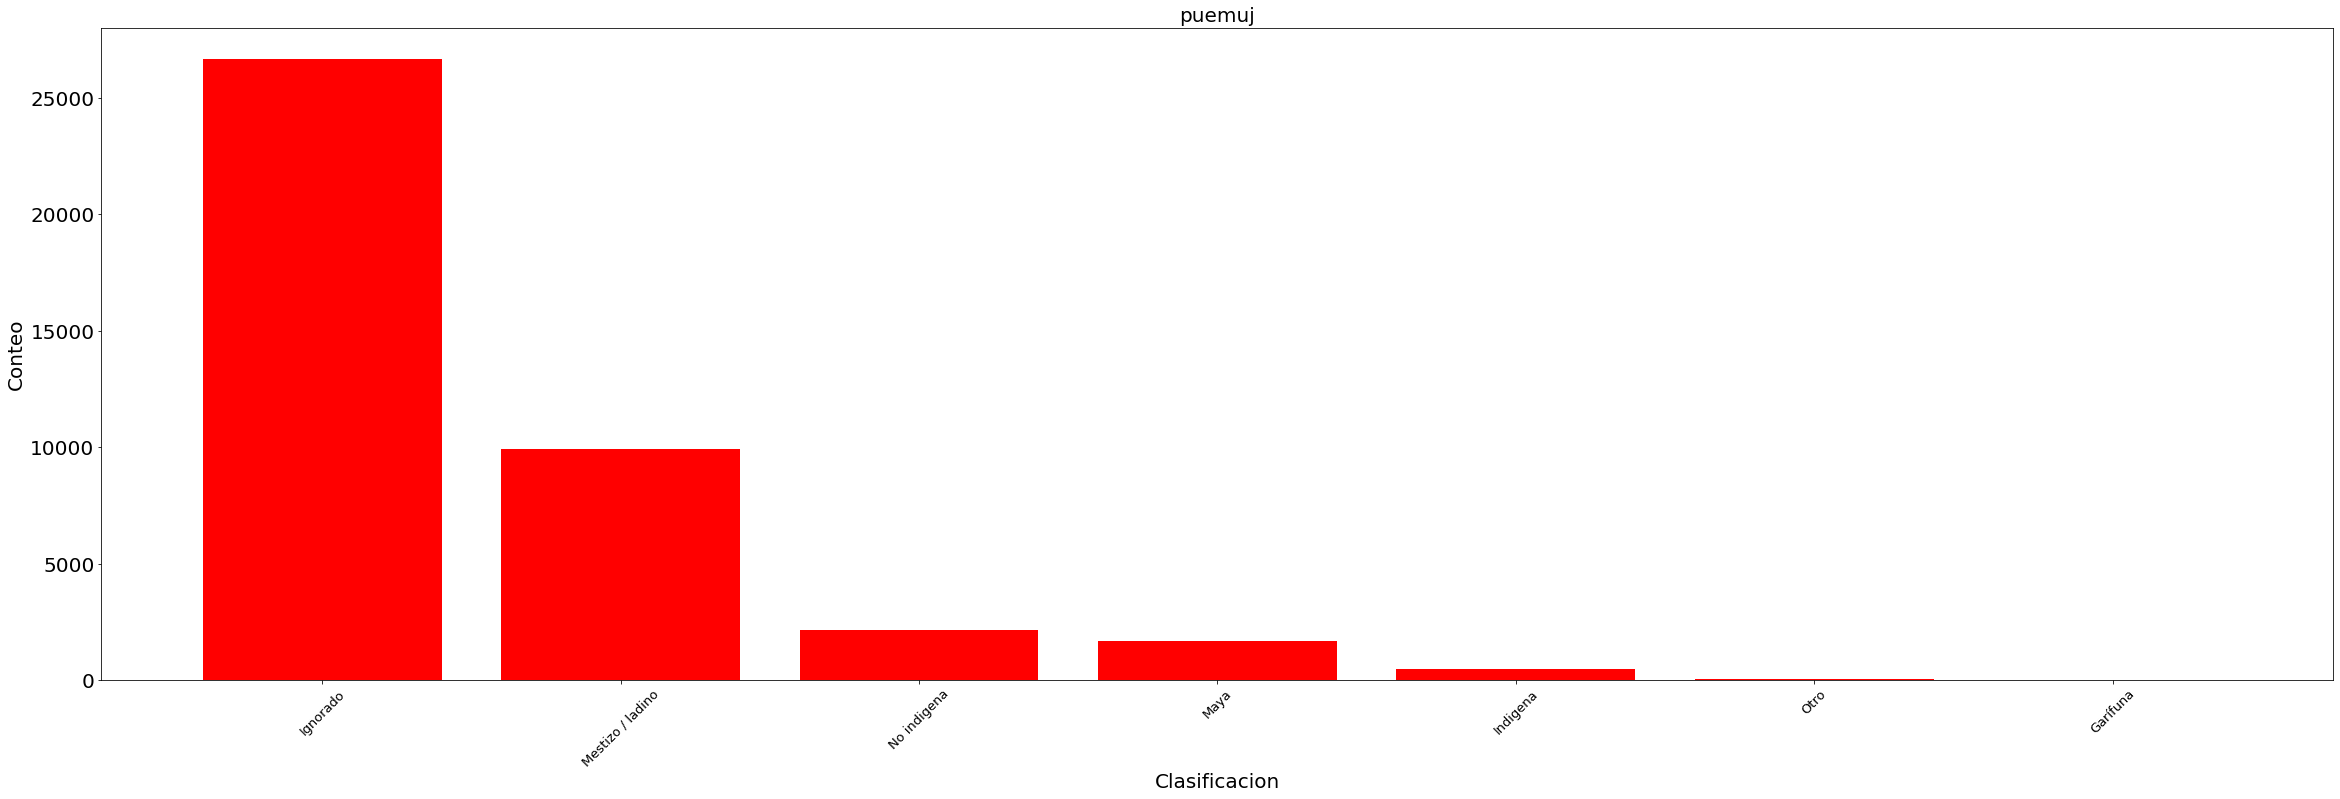

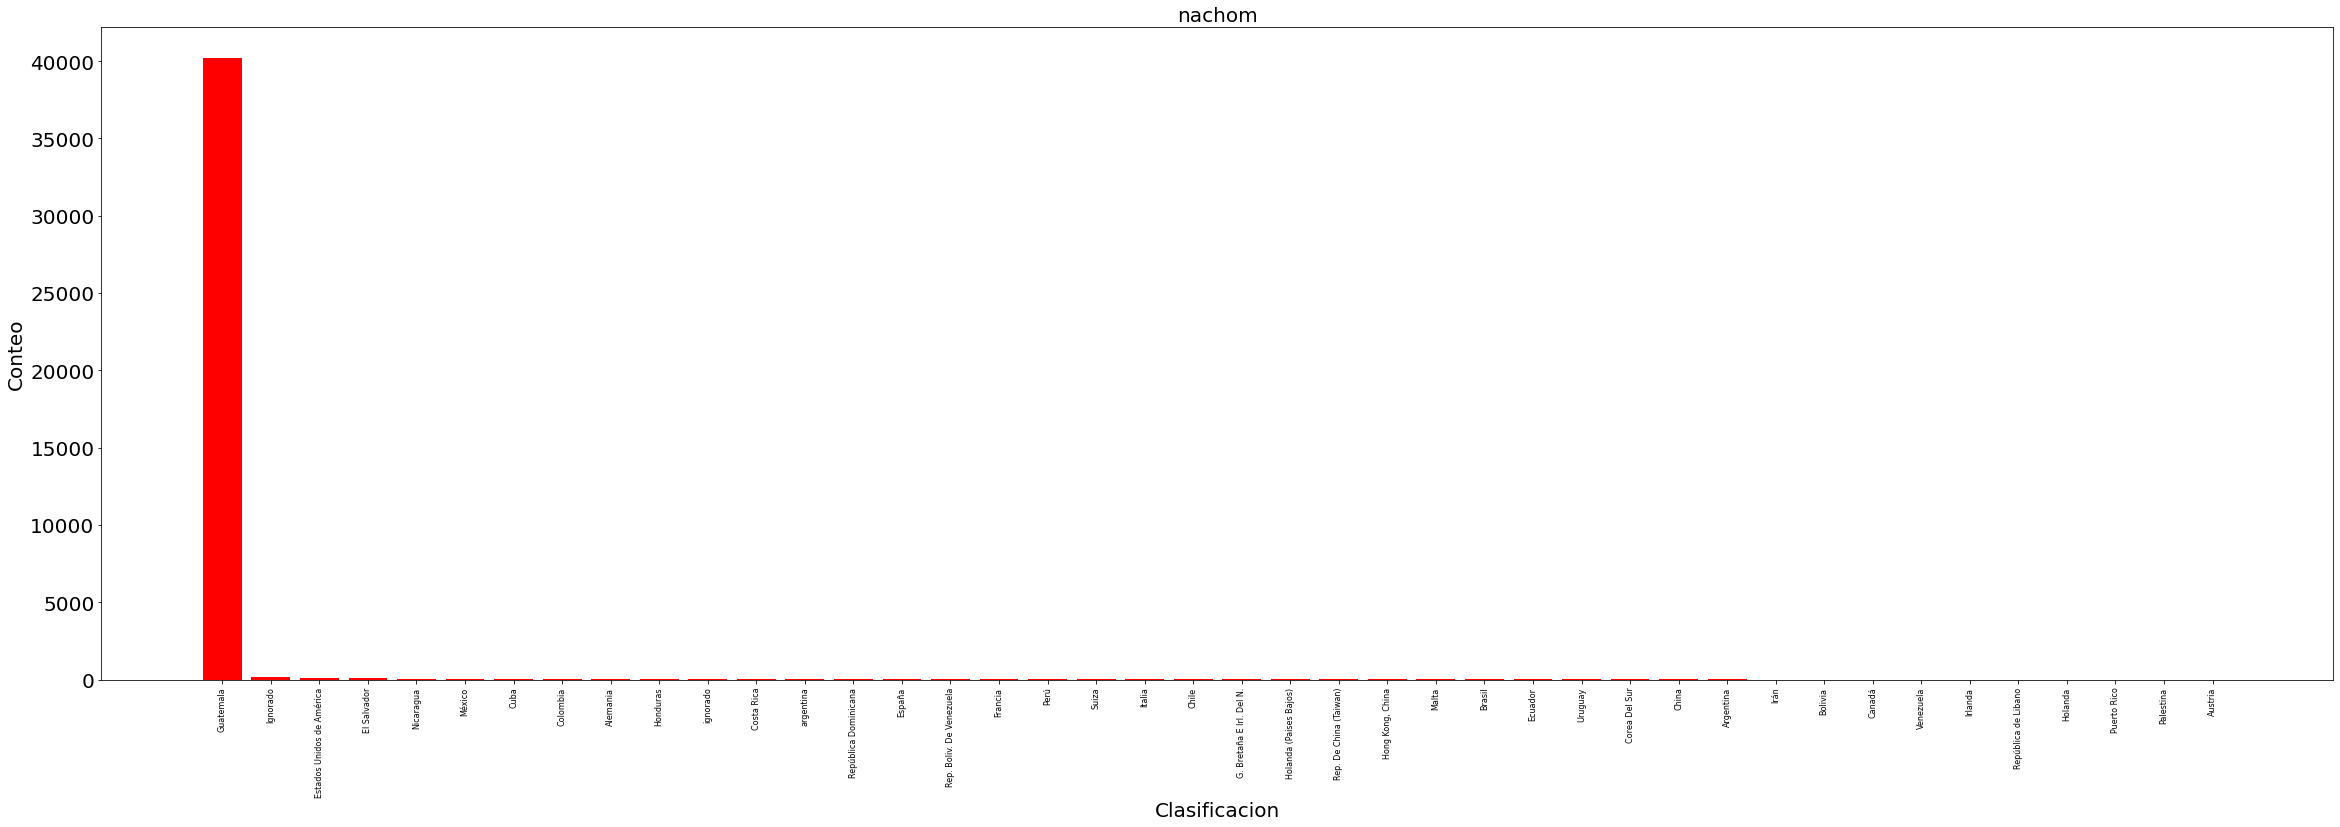

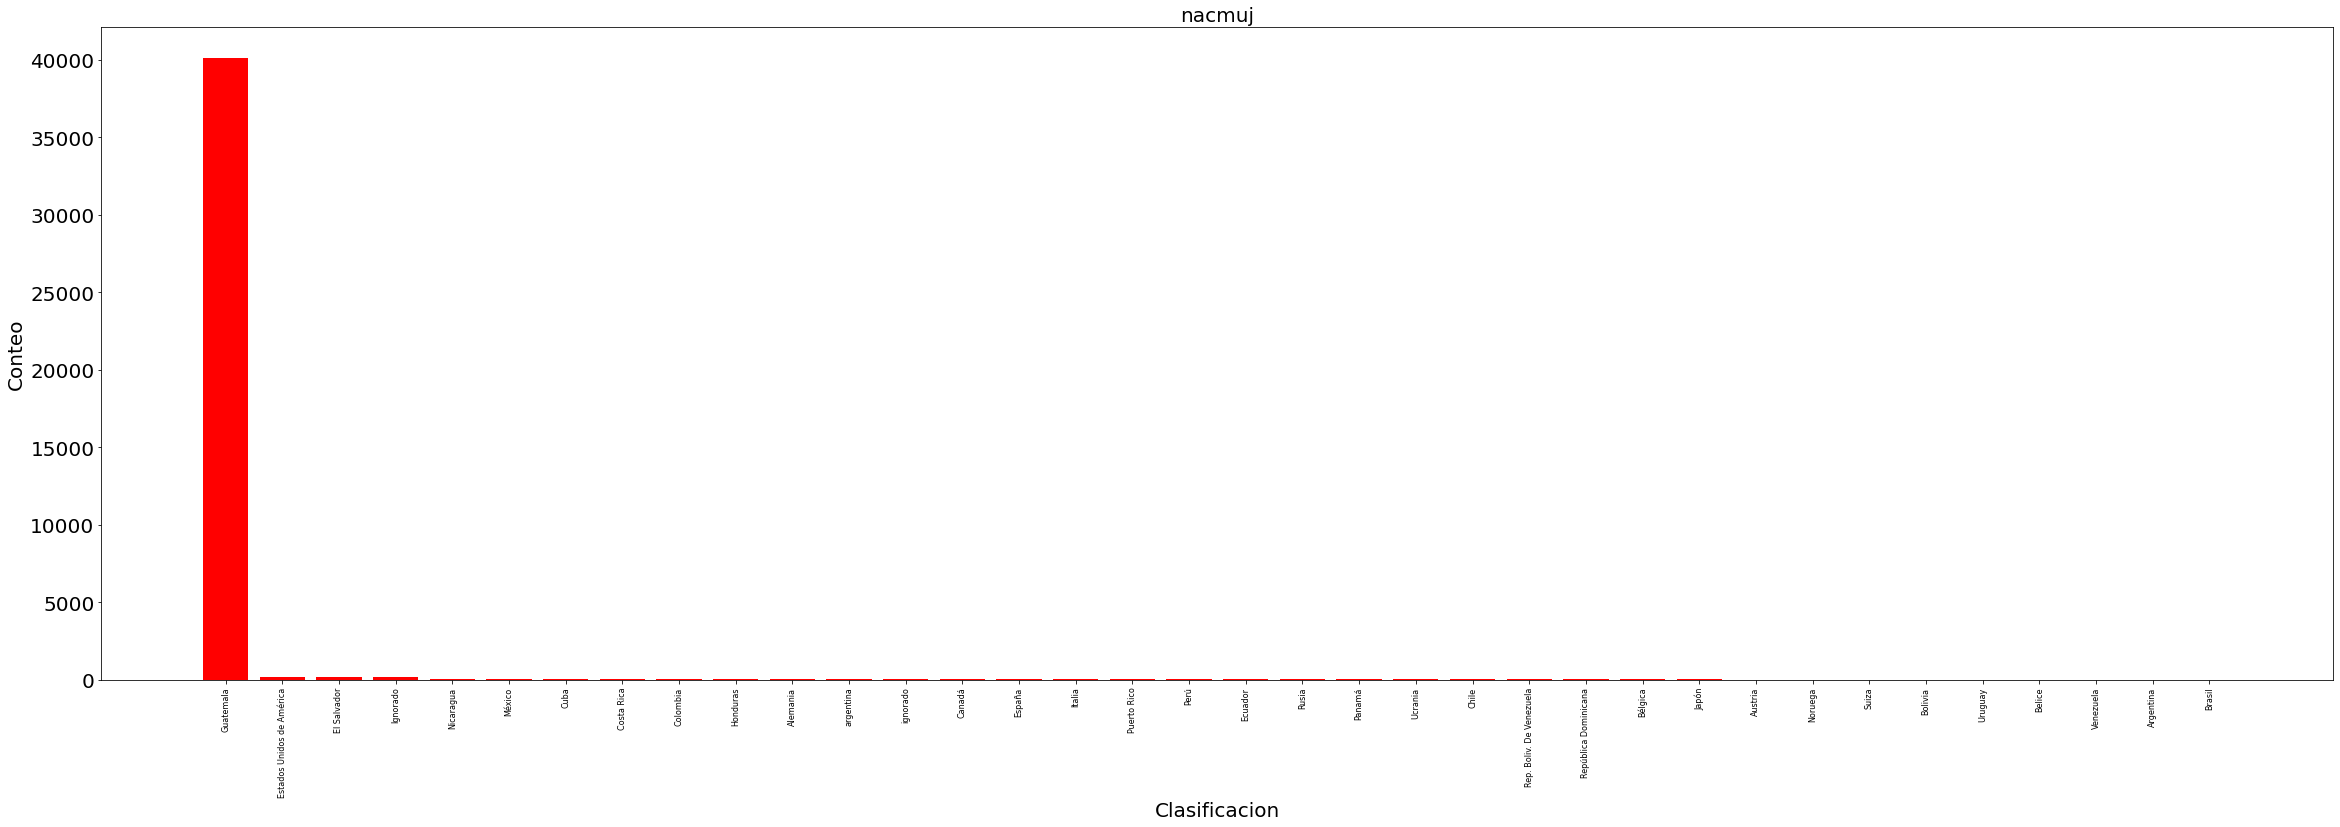

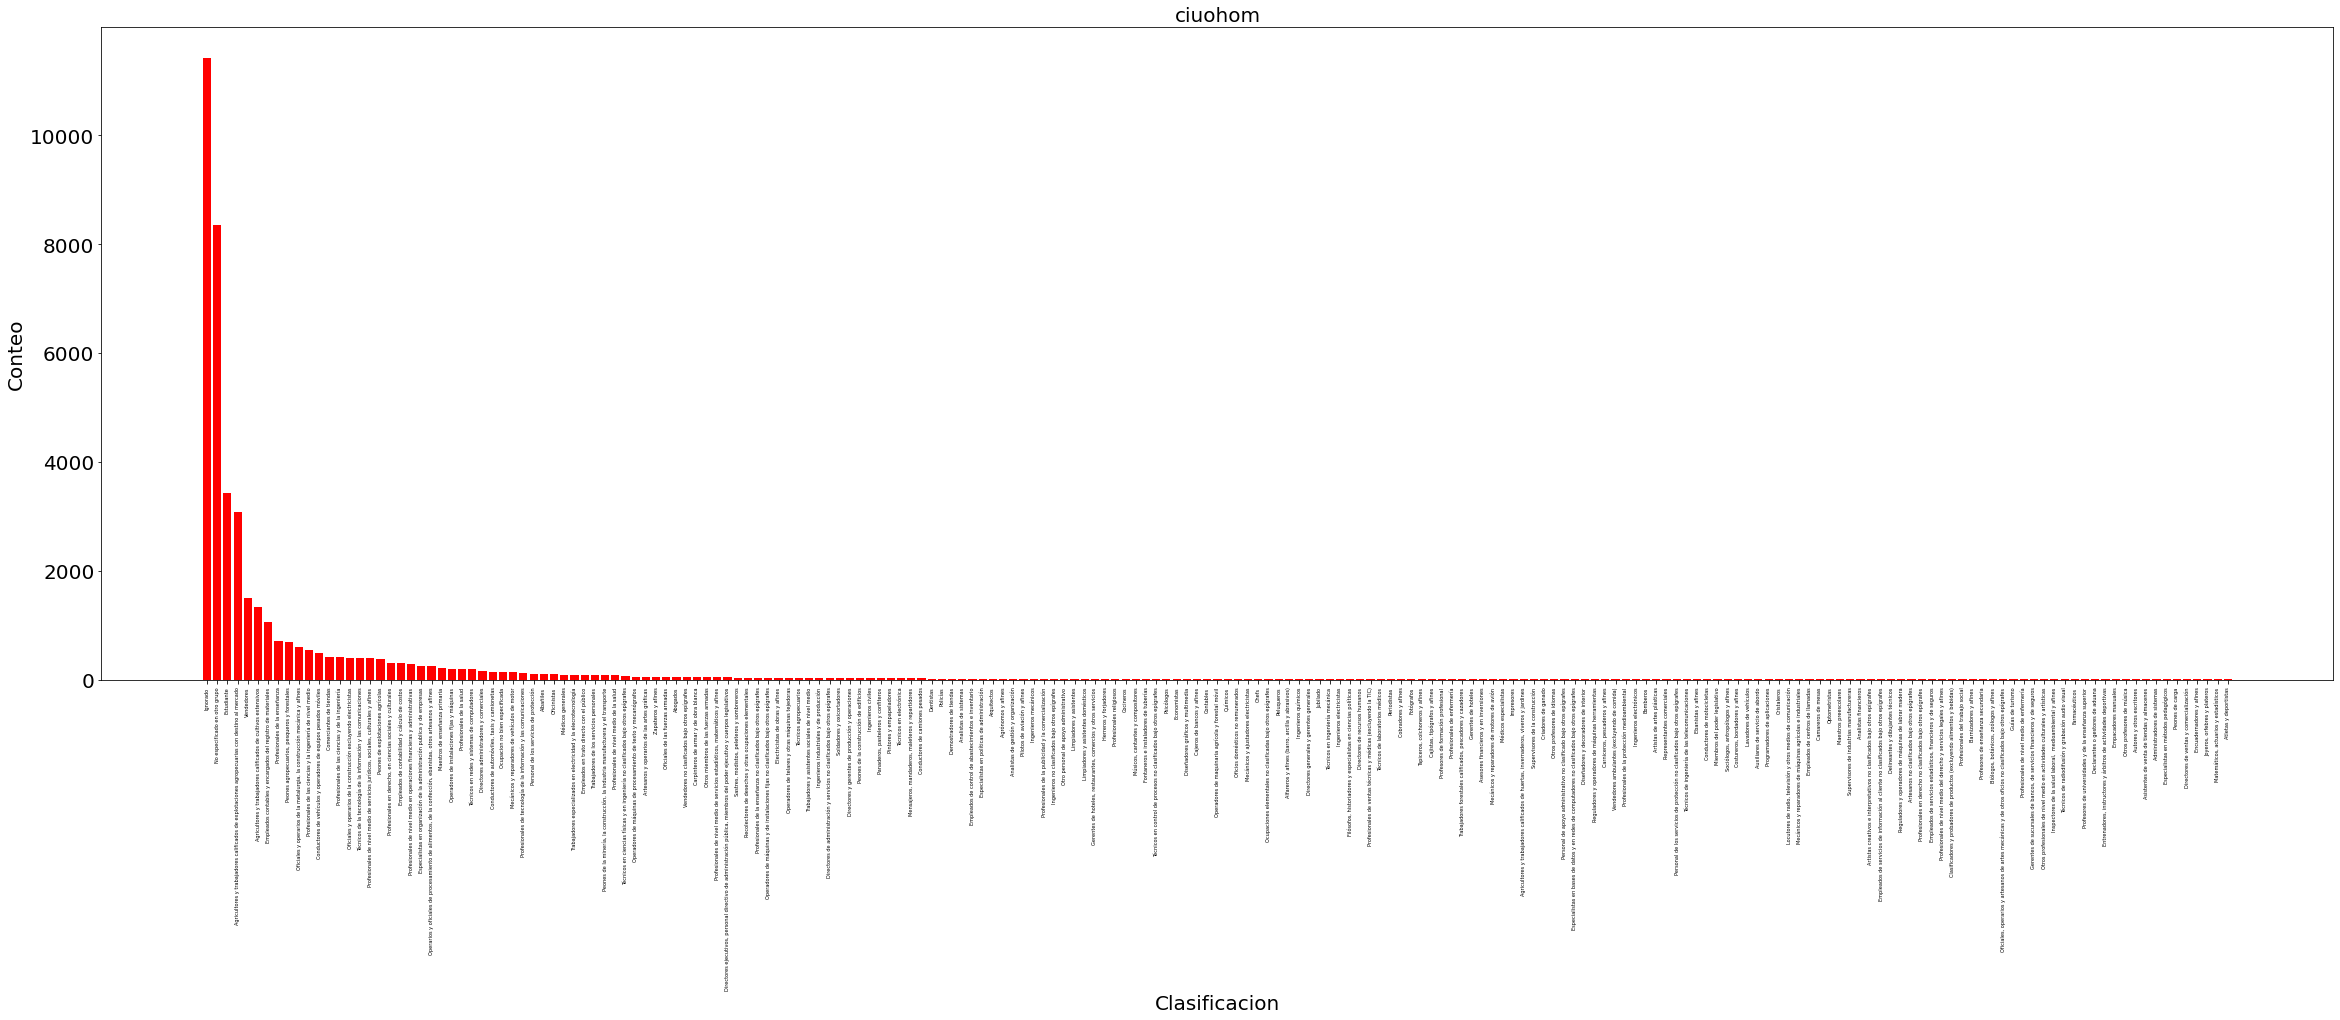

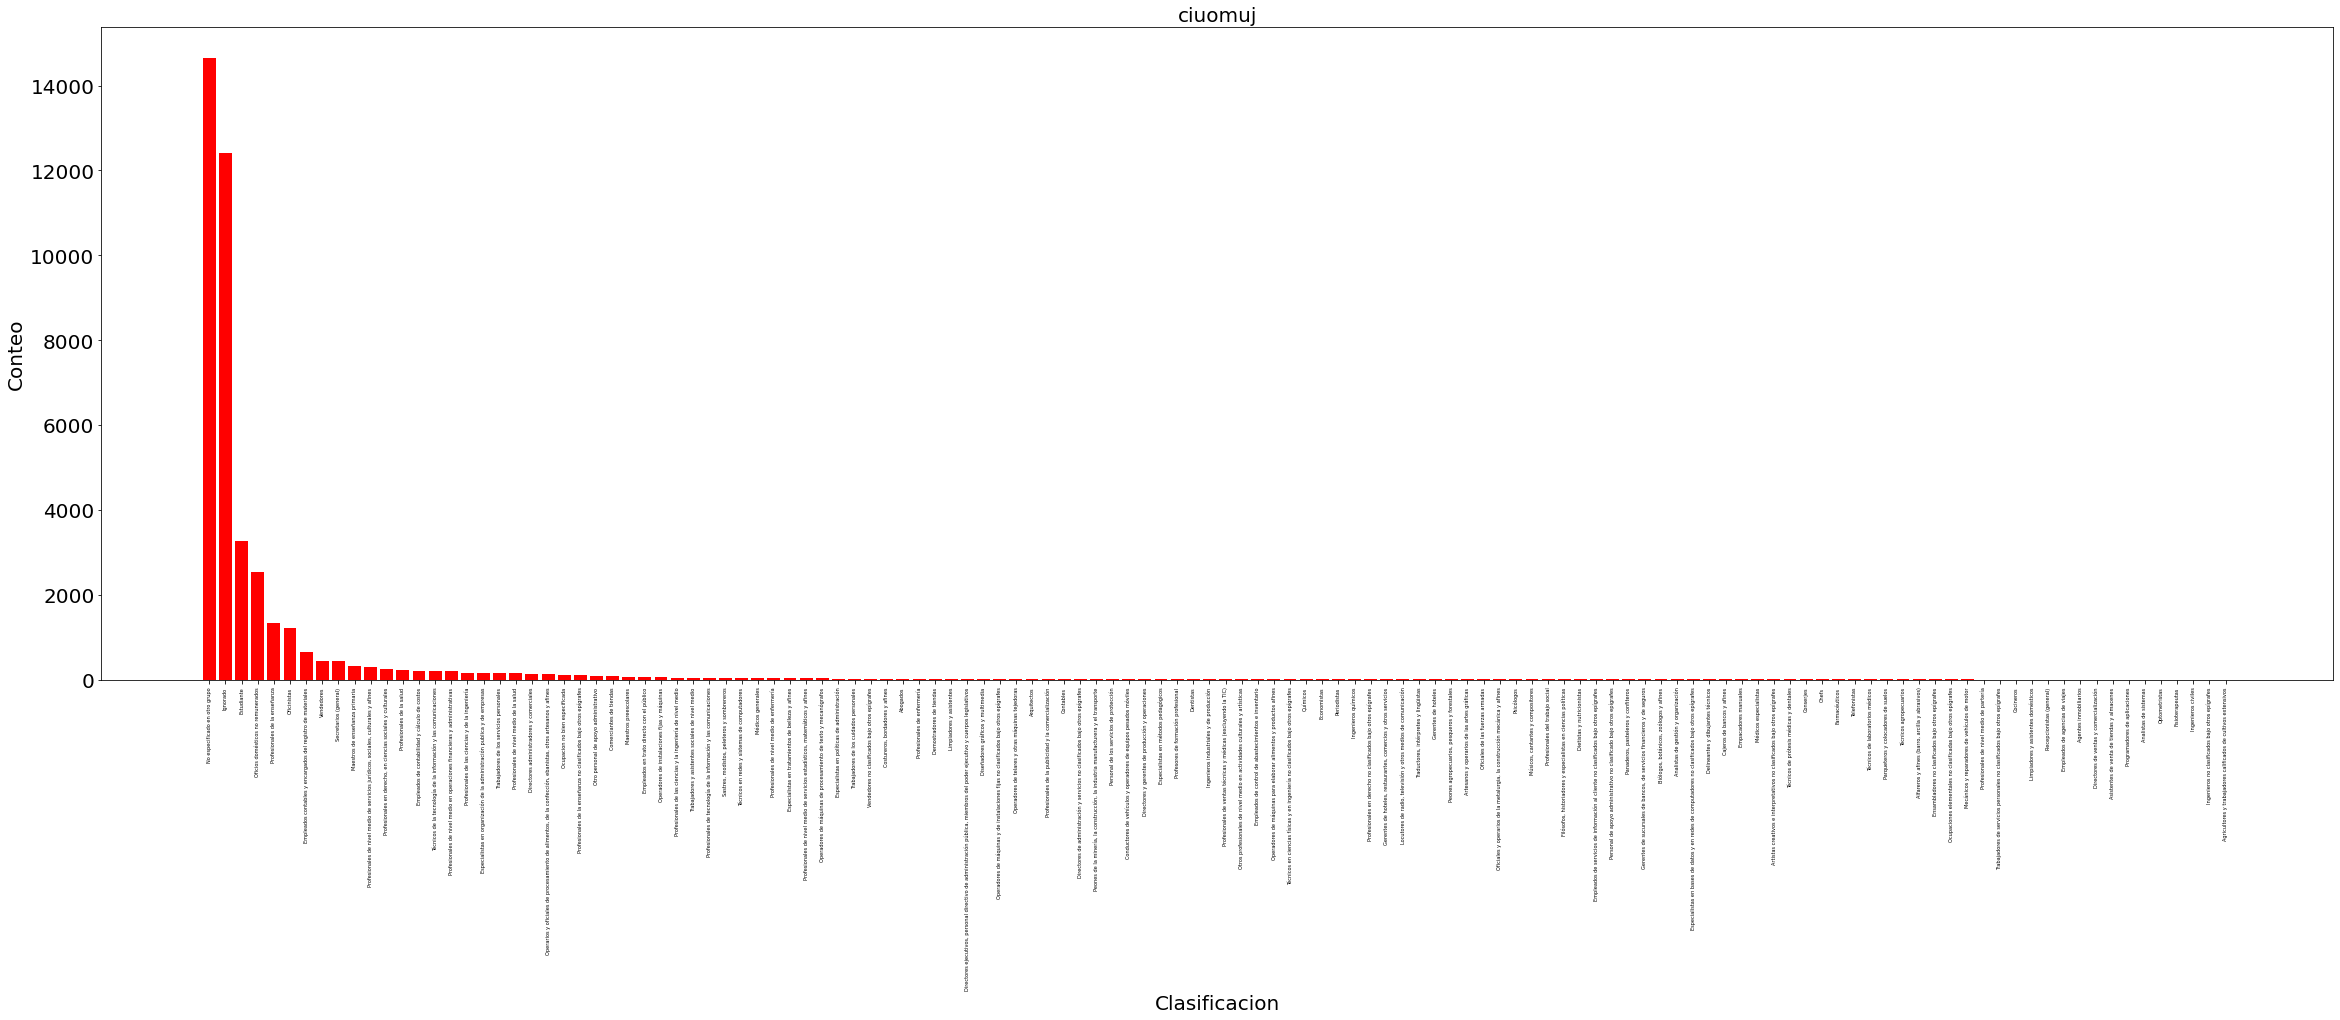

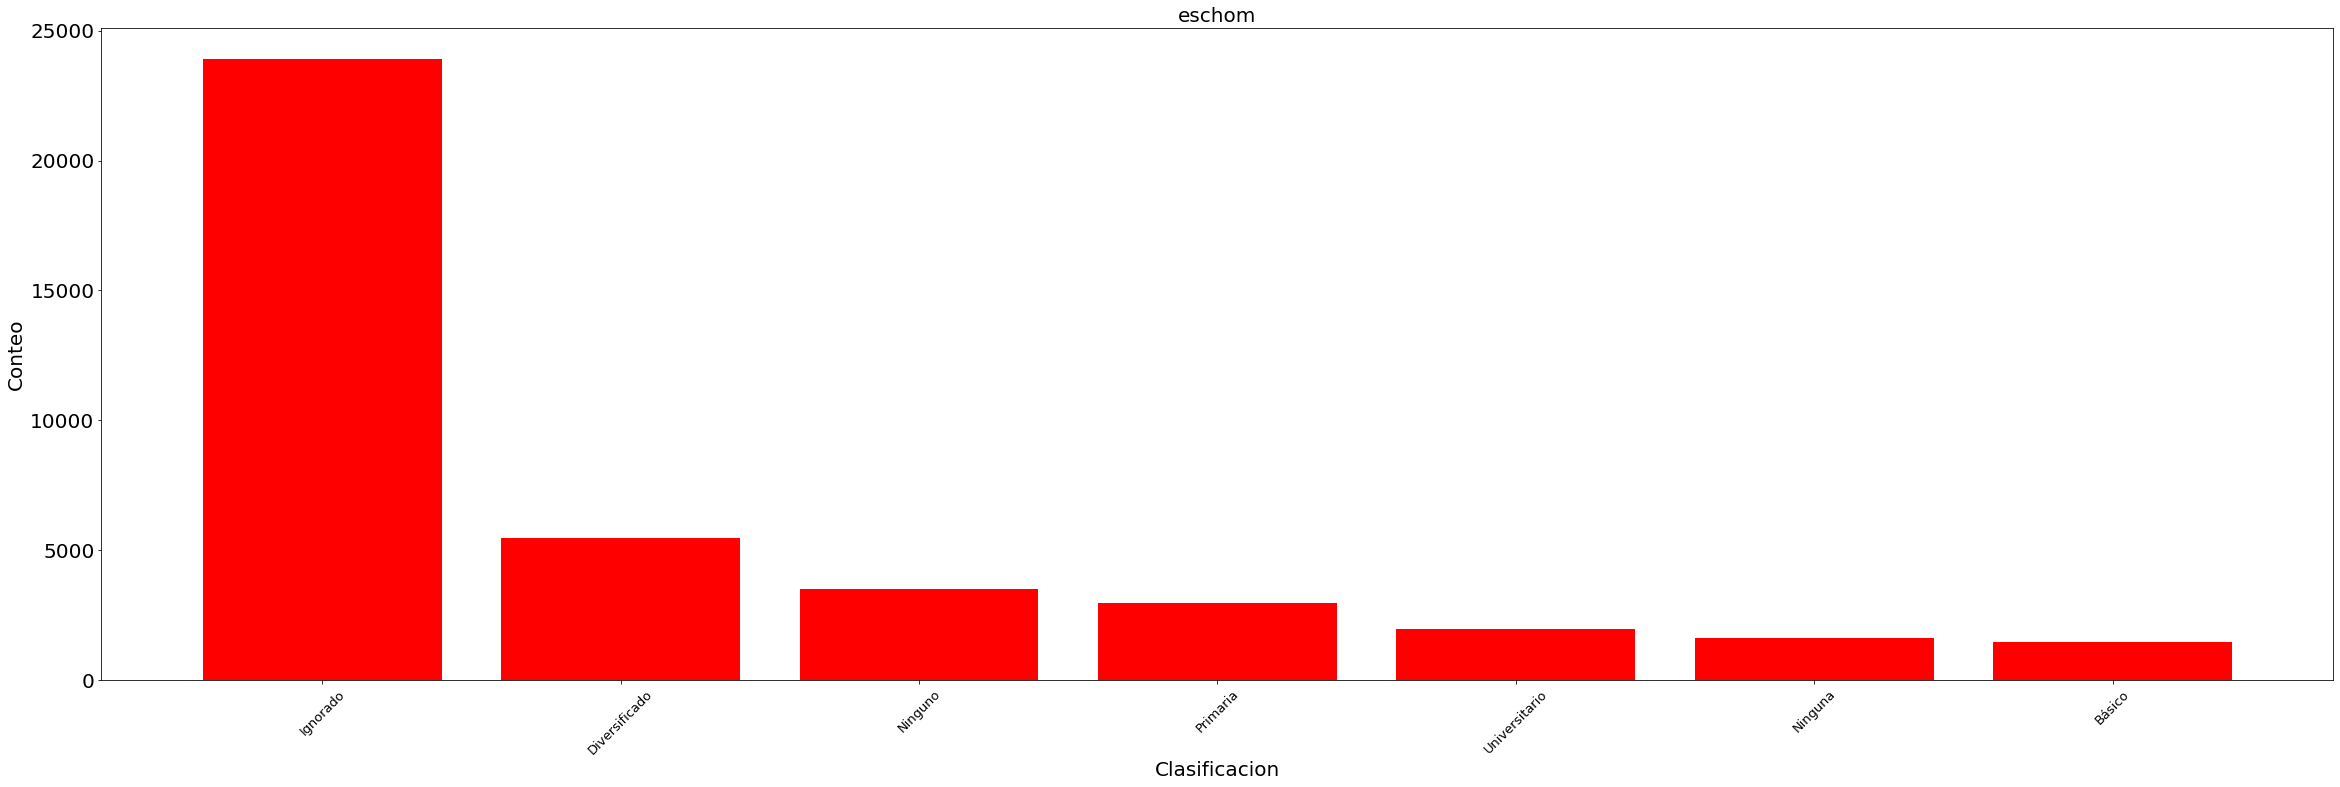

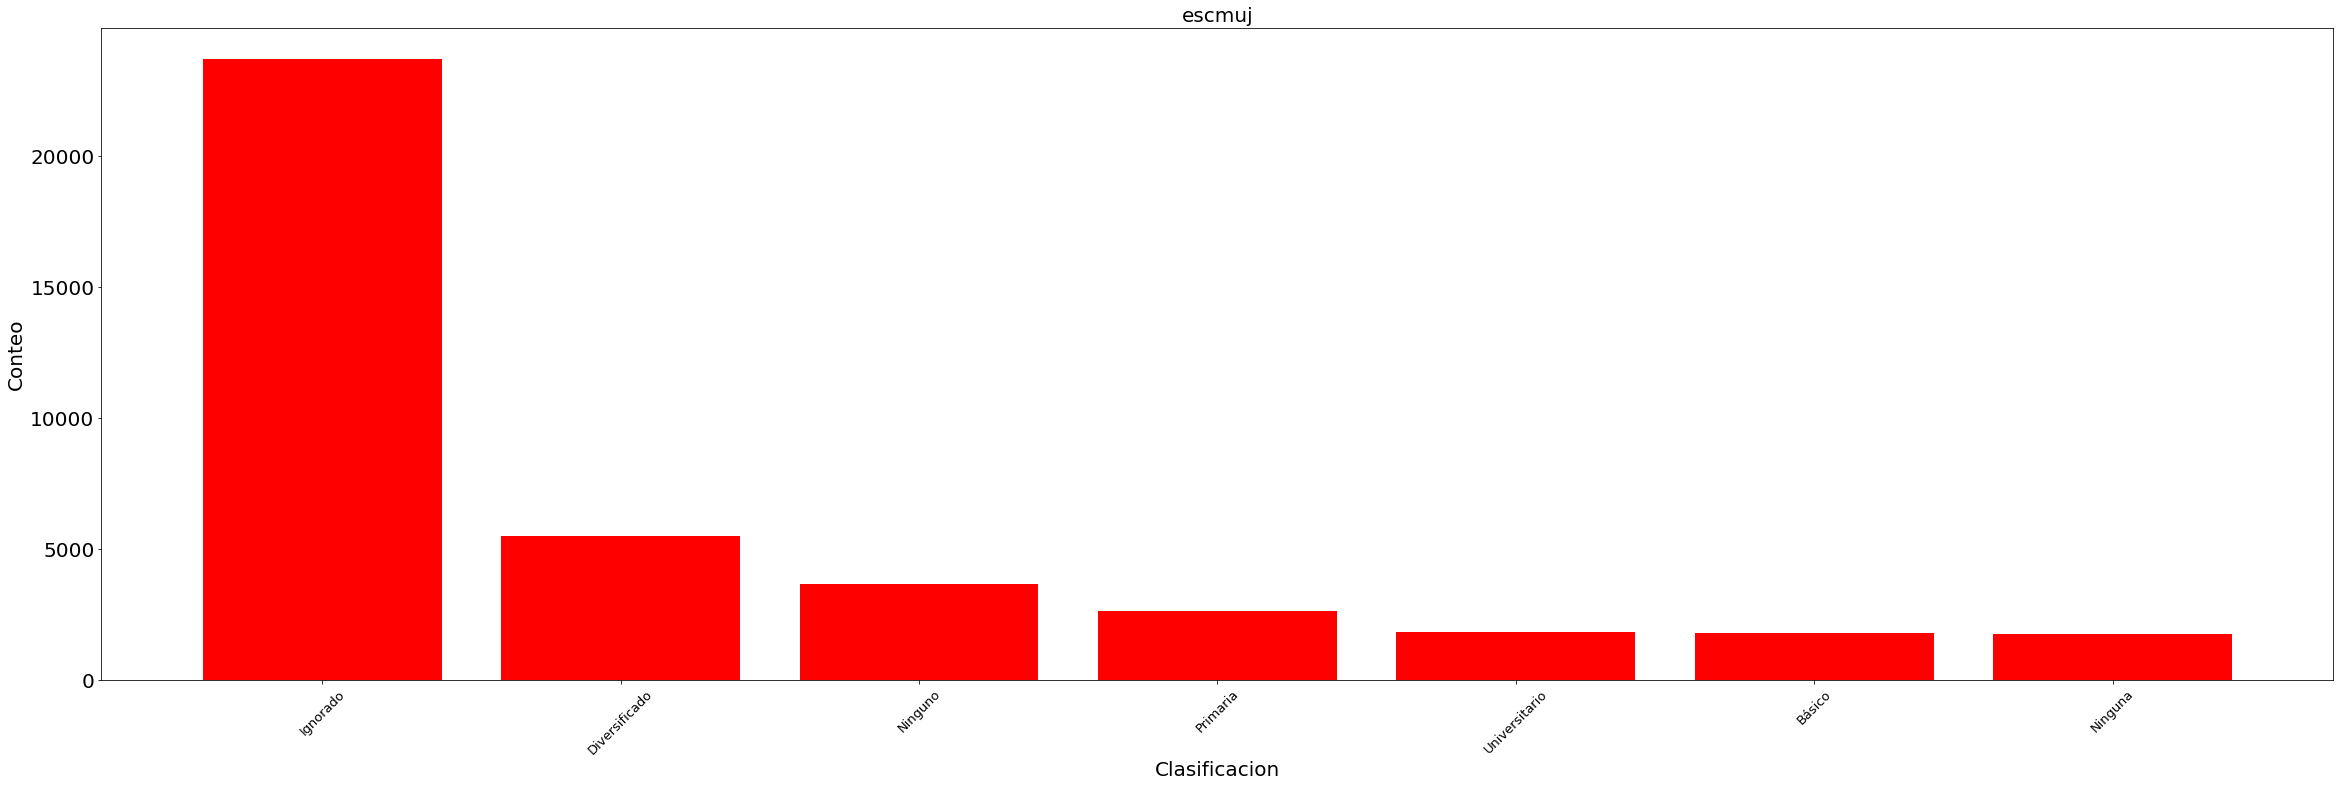

In [41]:
for columna in columnas:
    count = divorcios_cualitativos[columna].value_counts().sort_values(ascending=False).reset_index()
    count = count.rename(columns={"index": columna, columna: "Count"})
    
    if columna == 'mupreg' or columna == 'mupocu' or columna == 'ciuohom' or columna == 'ciuomuj':  
        plt.figure(figsize=(40,12))
        plt.bar(count[columna], count['Count'], color='r')
        plt.title(columna, size=20)
        plt.xlabel('Clasificacion', size=20)
        plt.ylabel('Conteo', size=20)
        plt.xticks(rotation=90, size=5)
        plt.yticks(size=20)
        plt.show()
    elif columna == 'nachom' or columna == 'nacmuj':
        plt.figure(figsize=(40,12))
        plt.bar(count[columna], count['Count'], color='r')
        plt.title(columna, size=20)
        plt.xlabel('Clasificacion', size=20)
        plt.ylabel('Conteo', size=20)
        plt.xticks(rotation=90, size=8)
        plt.yticks(size=20)
        plt.show()
    else:
        plt.figure(figsize=(40,12))
        plt.bar(count[columna], count['Count'], color='r')
        plt.title(columna, size=20)
        plt.xlabel('Clasificacion', size=20)
        plt.ylabel('Conteo', size=20)
        plt.xticks(rotation=45, size=13)
        plt.yticks(size=20)
        plt.show()

### Tablas de frecuencias de variables cuantitativas

In [47]:
divorcios_cuantitativos = divorcios[['anoreg', 'diaocu', 'anoocu', 'edadhom', 'edadmuj']]
columnas = []

for col in divorcios_cuantitativos.columns:
    columnas.append(col)

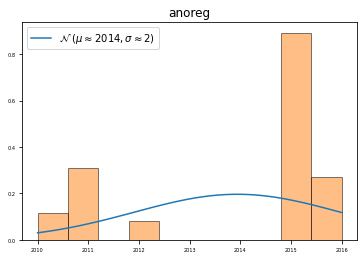

anoreg Kurtosis:  -0.9797271666687228
anoreg Sesgo:  -0.849826992530051


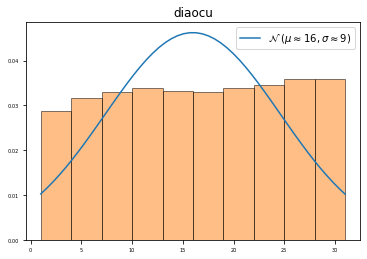

diaocu Kurtosis:  -1.1815350681651762
diaocu Sesgo:  -0.02265851757422267


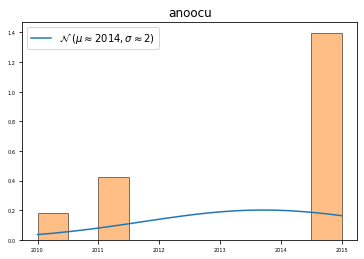

anoocu Kurtosis:  -1.063355878458243
anoocu Sesgo:  -0.9223827342948843


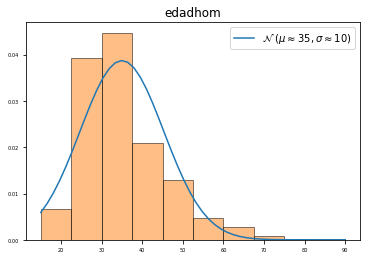

edadhom Kurtosis:  1.7573454699479378
edadhom Sesgo:  1.1949921979916913


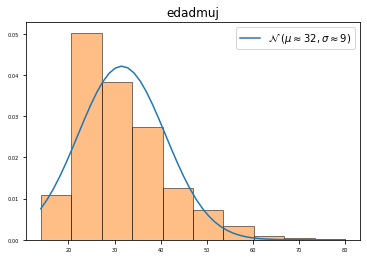

edadmuj Kurtosis:  1.324705216025135
edadmuj Sesgo:  1.0888975903394962


In [50]:
for col in divorcios_cuantitativos:
    serie = pd.to_numeric(divorcios_cuantitativos[col], errors='coerce')

    std = np.std(serie, ddof=1)
    mean = np.mean(serie)
    kurtosis = serie.kurtosis()
    skew = serie.skew()

    domain = np.linspace(np.min(serie), np.max(serie))

    plt.plot(
        domain,
        norm.pdf(domain, mean, std),
        label='$\mathcal{N}$ ' + f'$( \mu \\approx {round(mean)} , \sigma \\approx {round(std)} )$')
    plt.hist(serie, edgecolor='black', alpha=0.5, density=True)
    plt.title(col)
    plt.legend()
    plt.show()

    print(col, 'Kurtosis: ', kurtosis)
    print(col, 'Sesgo: ', skew)

### Resultado

In [7]:
divorcios

,depreg,mupreg,mesreg,anoreg,diaocu,mesocu,anoocu,depocu,mupocu,edadhom,edadmuj,puehom,puemuj,nachom,nacmuj,ciuohom,ciuomuj,eschom,escmuj
3006,Guatemala,Guatemala,Marzo,2010.0,16.0,Febrero,2010.0,Guatemala,Guatemala,42.0,31.0,Ignorado,Ignorado,Guatemala,Guatemala,Diseñadores gráficos y multimedia,Directores de administración y servicios no cl...,Diversificado,Ignorado
3007,Guatemala,Guatemala,Octubre,2010.0,25.0,Agosto,2010.0,Guatemala,Guatemala,47.0,36.0,Ignorado,Ignorado,Guatemala,Guatemala,Comerciantes de tiendas,Directores de administración y servicios no cl...,Ninguna,Ninguna
3008,Guatemala,Guatemala,Agosto,2010.0,20.0,Mayo,2010.0,Guatemala,Guatemala,Ignorado,Ignorado,Ignorado,Ignorado,Estados Unidos de América,México,Estudiante,Directores de administración y servicios no cl...,Ignorado,Ignorado
3009,Alta Verapaz,Cobán,Marzo,2010.0,28.0,Enero,2010.0,Alta Verapaz,Cobán,23.0,37.0,No indigena,No indigena,Guatemala,Guatemala,Estudiante,Directores de ventas y comercialización,Ignorado,Básico
3010,Guatemala,Guatemala,Octubre,2010.0,23.0,Junio,2010.0,Guatemala,Guatemala,Ignorado,Ignorado,Ignorado,Ignorado,Guatemala,Guatemala,Vendedores no clasificados bajo otros epígrafes,"Gerentes de sucursales de bancos, de servicios...",Ignorado,Ignorado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60621,Sacatepequez,Antigua Guatemala,Diciembre,2011.0,12.0,Septiembre,2011.0,Sacatepequez,Antigua Guatemala,Ignorado,Ignorado,No indigena,No indigena,Guatemala,Estados Unidos de América,Ignorado,Ignorado,Ignorado,Ignorado
60622,Suchitepequez,Mazatenango,Julio,2011.0,27.0,Mayo,2011.0,Suchitepequez,Mazatenango,49.0,Ignorado,No indigena,Ignorado,Guatemala,Estados Unidos de América,Agricultores y trabajadores calificados de cul...,Secretarios (general),Universitario,Ignorado
60623,Solola,Panajachel,Diciembre,2011.0,1.0,Diciembre,2011.0,Solola,Sololá,Ignorado,Ignorado,Ignorado,Ignorado,Estados Unidos de América,Estados Unidos de América,Ignorado,Ignorado,Ignorado,Ninguna
60624,Solola,Santa Cruz la Laguna,Enero,2012.0,5.0,Diciembre,2011.0,Solola,Santa Cruz la Laguna,47.0,49.0,No indigena,No indigena,Francia,Estados Unidos de América,"Filósofos, historiadores y especialistas en ci...",Especialistas en tratamientos de belleza y afines,Universitario,Universitario


## Matrimonios

In [8]:
matrimonios = pd.read_csv('./Archivos/matrimonios.csv',low_memory=False)
#matrimonios = matrimonios.dropna()


In [9]:
matrimonios.shape

(907782, 27)

In [10]:
matrimonios.head()

,depreg,mupreg,mesreg,anoreg,clauni,edadhom,edadmuj,puehom,puemuj,nachom,nacmuj,ocuhom,ocumuj,nuphon,nupmuj,depocu,mupocu,mesocu,anoocu,areagocu,eschom,escmuj,diaocu,ciuohom,ciuomuj,nunuho,nunumu
0,San Marcos,Comitancillo,Abril,2010.0,Matrimonio,16.0,14.0,Indigena,Indigena,Guatemala,Guatemala,Ignorado,Ignorado,Ignorado,Ignorado,San Marcos,Comitancillo,Septiembre,2009.0,Ignorado,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Retalhuleu,Retalhuleu,Mayo,2009.0,Matrimonio,16.0,14.0,Ignorado,Ignorado,Guatemala,Guatemala,Agricultores y trabajadores calificados de cul...,Oficios domésticos no remunerados,Ignorado,Ignorado,Retalhuleu,Retalhuleu,Marzo,2009.0,Ignorado,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Huehuetenango,Chiantla,Enero,2010.0,Matrimonio,16.0,14.0,Ignorado,Ignorado,Guatemala,Guatemala,Agricultores y trabajadores calificados de cul...,Oficios domésticos no remunerados,1.0,1.0,Huehuetenango,Chiantla,Diciembre,2009.0,Ignorado,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Quiche,Joyabaj,Agosto,2009.0,Matrimonio,16.0,14.0,Indigena,Indigena,Guatemala,Guatemala,Agricultores y trabajadores calificados de cul...,Oficios domésticos no remunerados,1.0,1.0,Quiche,Joyabaj,Julio,2009.0,Ignorado,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Quiche,Joyabaj,Octubre,2009.0,Matrimonio,16.0,14.0,Indigena,Indigena,Guatemala,Guatemala,Agricultores y trabajadores calificados de cul...,Oficios domésticos no remunerados,1.0,1.0,Quiche,Joyabaj,Octubre,2009.0,Ignorado,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#convertir los datos de strings a enteros
matrimonios['edadhom'] = pd.to_numeric(matrimonios['edadhom'],errors='coerce', downcast="integer")
matrimonios['edadmuj'] = pd.to_numeric(matrimonios['edadmuj'],errors='coerce', downcast="integer")
matrimonios['anoreg'] = pd.to_numeric(matrimonios['anoreg'],errors='coerce', downcast="integer")
matrimonios['nunuho'] = pd.to_numeric(matrimonios['nunuho'],errors='coerce', downcast="integer")
matrimonios['nunumu'] = pd.to_numeric(matrimonios['nunumu'],errors='coerce', downcast="integer")


#quedarse con un valor de mestizo y ladino
matrimonios["puehom"]=matrimonios.puehom.str.split('/').str[0]
matrimonios["puemuj"]=matrimonios.puemuj.str.split('/').str[0]

#quitar los valores de NaN
matrimonios['nunumu'] = matrimonios['nunumu'].fillna(0)
matrimonios['nunuho'] = matrimonios['nunuho'].fillna(0)

In [12]:
#funcion que recibe un dataframe y el nombre de una columna y saca la kurtosis y el sego, asi como crea un box plot y un histograma
def normalidad_datos(df,columna):
    #pruebas estadisticas para comprobar si es o no normal
    kurtosis = df[[columna]].kurtosis()
    skew = df[[columna]].skew()

    fig = plt.figure(figsize=(10,10),constrained_layout=True)
    gs = fig.add_gridspec(nrows=2,ncols=2)
    fig.suptitle('Pruebas de Normalidad: '+columna + '\n kurtosis: '+ str(kurtosis[0]) + '\n Sesgo: ' + str(skew[0]), fontsize=16, color='w')
    fig.set_facecolor('#5e6e65')

    ax1 = fig.add_subplot(gs[0,0])
    df[[columna]].boxplot(ax=ax1)
    #datos.budget.plot.kde(ax=ax1,secondary_y=True)
    ax1.set_title('Boxplot',color='w')

    ax2 = fig.add_subplot(gs[0,1])
    df[[columna]].hist(ax=ax2)
    #datos.revenue.plot.kde(ax=ax2,secondary_y=True)
    ax2.set_title('hist',color='w')

    plt.show()

In [13]:
matrimonios.head()

,depreg,mupreg,mesreg,anoreg,clauni,edadhom,edadmuj,puehom,puemuj,nachom,nacmuj,ocuhom,ocumuj,nuphon,nupmuj,depocu,mupocu,mesocu,anoocu,areagocu,eschom,escmuj,diaocu,ciuohom,ciuomuj,nunuho,nunumu
0,San Marcos,Comitancillo,Abril,2010,Matrimonio,16.0,14.0,Indigena,Indigena,Guatemala,Guatemala,Ignorado,Ignorado,Ignorado,Ignorado,San Marcos,Comitancillo,Septiembre,2009.0,Ignorado,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,Retalhuleu,Retalhuleu,Mayo,2009,Matrimonio,16.0,14.0,Ignorado,Ignorado,Guatemala,Guatemala,Agricultores y trabajadores calificados de cul...,Oficios domésticos no remunerados,Ignorado,Ignorado,Retalhuleu,Retalhuleu,Marzo,2009.0,Ignorado,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,Huehuetenango,Chiantla,Enero,2010,Matrimonio,16.0,14.0,Ignorado,Ignorado,Guatemala,Guatemala,Agricultores y trabajadores calificados de cul...,Oficios domésticos no remunerados,1.0,1.0,Huehuetenango,Chiantla,Diciembre,2009.0,Ignorado,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,Quiche,Joyabaj,Agosto,2009,Matrimonio,16.0,14.0,Indigena,Indigena,Guatemala,Guatemala,Agricultores y trabajadores calificados de cul...,Oficios domésticos no remunerados,1.0,1.0,Quiche,Joyabaj,Julio,2009.0,Ignorado,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,Quiche,Joyabaj,Octubre,2009,Matrimonio,16.0,14.0,Indigena,Indigena,Guatemala,Guatemala,Agricultores y trabajadores calificados de cul...,Oficios domésticos no remunerados,1.0,1.0,Quiche,Joyabaj,Octubre,2009.0,Ignorado,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [14]:
cuantitativas_mat = ['anoreg', 'edadhom', 'edadmuj', 'nunuho', 'nunumu', 'anoocu', 'diaocu']

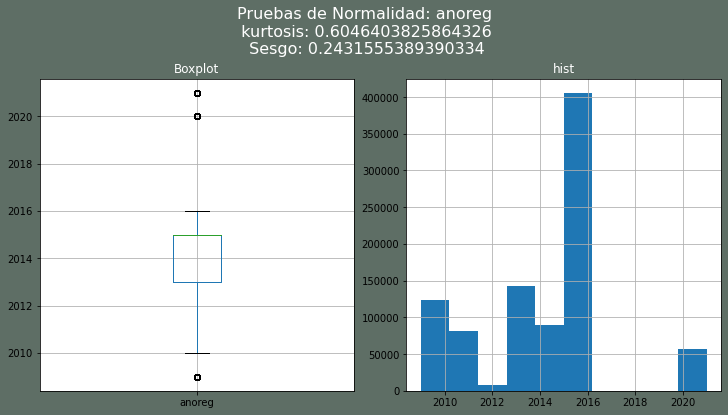

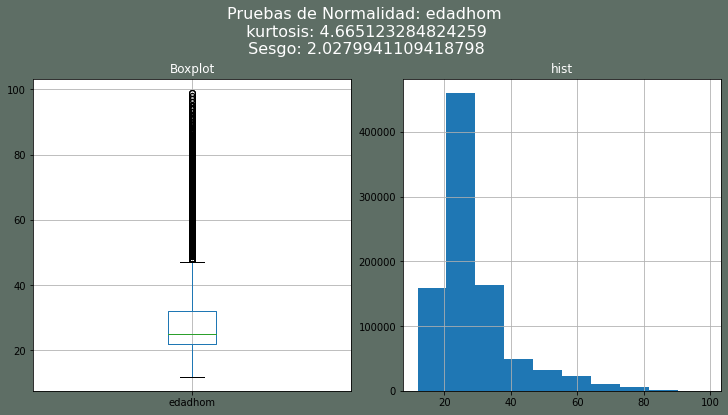

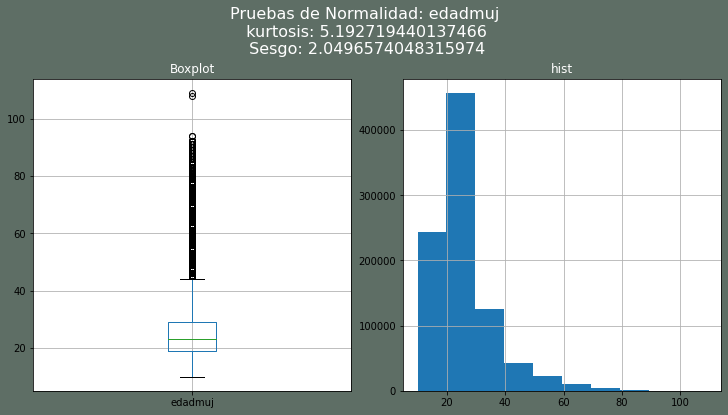

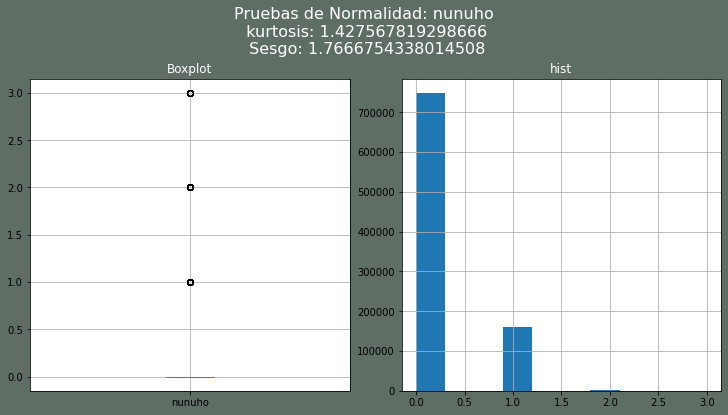

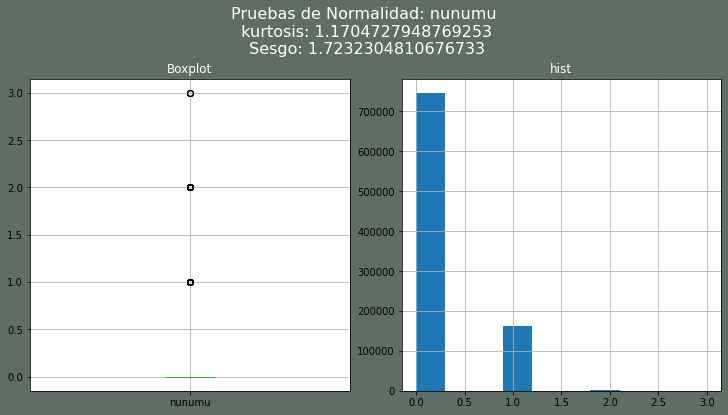

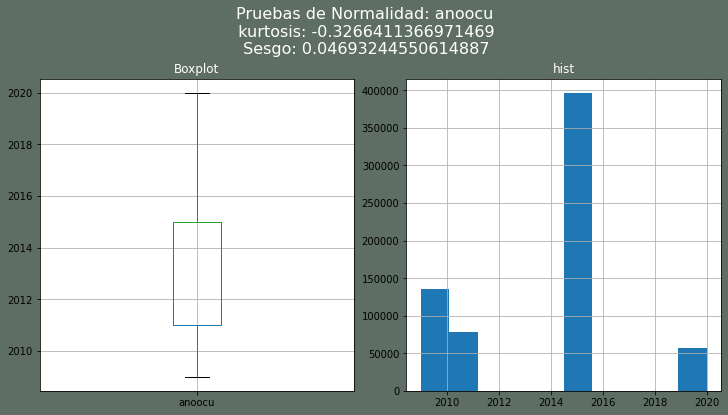

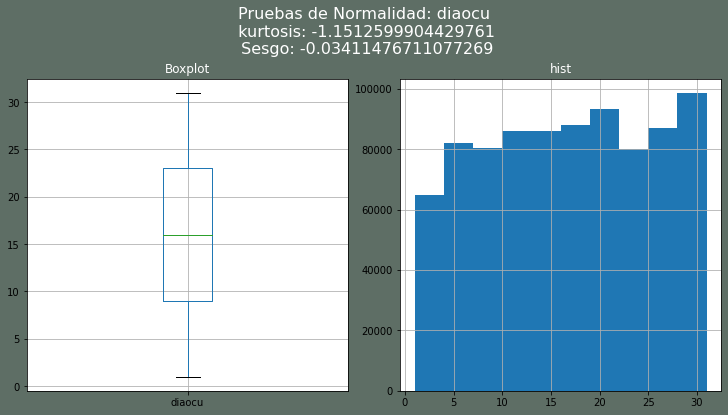

In [15]:
#recorrer lista con columnas cuantitativas y crear graficos boxplot y historgrama
for col in cuantitativas_mat:
    normalidad_datos(matrimonios,col)

In [16]:
matrimonios.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
anoreg,907782.0,2013.826130,2.567193,2009.0,2013.0,2015.0,2015.0,2021.0
edadhom,904945.0,28.811845,11.242430,12.0,22.0,25.0,32.0,99.0
edadmuj,904573.0,25.715937,10.005408,10.0,19.0,23.0,29.0,109.0
anoocu,666786.0,2013.853526,2.968239,2009.0,2011.0,2015.0,2015.0,2020.0
diaocu,845678.0,16.175343,8.574637,1.0,9.0,16.0,23.0,31.0
nunuho,907782.0,0.178560,0.387326,0.0,0.0,0.0,0.0,3.0
nunumu,907782.0,0.180169,0.387266,0.0,0.0,0.0,0.0,3.0


In [17]:
matrimonios.describe(include=["O"]).transpose()

,count,unique,top,freq
depreg,907782,28,Guatemala,189115
mupreg,907782,335,Guatemala,98698
mesreg,907782,12,Diciembre,94556
clauni,907782,5,Comunidad de gananciales,734774
puehom,907782,10,Mestizo,358974
puemuj,907782,10,Mestizo,339463
nachom,907782,111,Guatemala,900082
nacmuj,907782,92,Guatemala,898972
ocuhom,213514,259,Agricultores y trabajadores calificados de cul...,74045
ocumuj,213514,195,Oficios domésticos no remunerados,117960


In [18]:
result = matrimonios.groupby('eschom').nunique()
result

,depreg,mupreg,mesreg,anoreg,clauni,edadhom,edadmuj,puehom,puemuj,nachom,nacmuj,ocuhom,ocumuj,nuphon,nupmuj,depocu,mupocu,mesocu,anoocu,areagocu,escmuj,diaocu,ciuohom,ciuomuj,nunuho,nunumu
eschom,,,,,,,,,,,,,,,,,,,,,,,,,,
Básico,28,335,12,9,4,74,67,9,9,18,27,160,85,0,0,28,335,12,4,3,9,31,43,38,4,4
DIversificado,22,330,12,3,4,71,68,6,6,31,38,0,0,0,0,22,331,12,0,3,7,31,41,36,1,1
Diversificado,28,334,12,7,4,74,70,9,9,35,46,184,133,0,0,28,334,12,4,3,8,31,40,36,4,3
Ignorado,28,328,12,9,4,83,79,9,9,75,46,190,138,0,0,28,328,12,4,3,9,31,40,36,3,3
Ninguno,28,335,12,9,4,87,84,9,9,73,40,206,127,0,0,28,338,12,4,3,8,31,37,32,3,4
Post Grado,9,16,11,2,3,23,19,4,3,5,2,0,0,0,0,11,16,11,1,0,5,16,10,9,3,3
Postgrado,19,32,12,4,4,37,34,3,3,13,5,0,0,0,0,18,37,12,1,3,8,31,13,15,2,2
Primaria,28,335,12,9,4,84,80,9,9,14,27,166,99,0,0,28,336,12,4,3,9,31,41,37,4,4
Universitario,28,322,12,9,4,72,66,9,8,49,58,128,92,0,0,28,322,12,4,3,9,31,38,34,3,3
